### Graded Assignment 3.1: ANN for Medical Diagnosis

- Done by: A Alkaff Ahamed
- Grade: Pending
- 29 April 2025


## Learning Outcome Addressed
- Explore neural networks and Deep Learning principles, utilising frameworks such as TensorFlow and Keras to build and optimise models for various AI tasks.

Time to test your skills on the topics covered in this week. We recommend you try going through the [Python documentation](https://www.python.org/about/help/). if you have any issues. You may find some useful reference links in the Week 3: Video Transcripts and Additional Readings Page. You can also discuss your experience with your peers using the Week 3: Q&A Discussion Board.

**Note:** This assignment contains some optional essay-style sub-tasks. While these tasks do not carry any points, we recommend adding these answers into your submission as it would help you document important insights about your model's performance and training process. 


## Scenario:

A healthcare organisation wants to develop a diagnostic tool to predict whether a patient has diabetes based on various health metrics. Your task is to implement an Artificial Neural Network (ANN) to create an accurate prediction model that can assist healthcare providers in early diagnosis. 

## Assignment Instructions:

Create a Python notebook to construct, train, and evaluate an artificial neural network for diabetes prediction. This assignment will integrate supervised learning concepts with practical healthcare applications while exploring the capabilities of neural networks.

### Dataset

The enhanced_diabetes_dataset.csv contains health information for female patients of Pima Indian heritage, including:

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration (mg/dL)
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)²)
- DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
- Age: Age in years
- Outcome: Class variable (0 or 1) indicating whether the patient has diabetes (1) or not (0)


### Tasks:

#### Task 1: Utilise Libraries/Dataset

- Import all necessary libraries (pandas, numpy, matplotlib, seaborn, tensorflow/keras, scikit-learn)
- Load the diabetes dataset and display the first few rows
- Show basic information and statistics about the dataset

#### Task 2: Generate at least three EDA visualisations

- Create distribution plots comparing features between diabetic and non-diabetic patients
- Develop correlation heatmap to identify relationships between features
- Visualise feature importance using appropriate techniques

#### Task 3: Analyse data quality

- Check for missing or zero values (particularly in SkinThickness, Insulin, and BMI)
- Identify and handle outliers 

#### Task 4: Prepare Features and Target Variable

- Split data into features (X) and target (y)
- Normalise/standardise features

#### Task 5: Class Imbalance and Dataset Splitting

- Handle class imbalance if present (using techniques like SMOTE or class weights).
   - You may use this link as reference for help with this sub-task -[https://www.turing.com/kb/smote-for-an-imbalanced-dataset](https://www.turing.com/kb/smote-for-an-imbalanced-dataset).
- Split data into training (70%), validation (15%), and test (15%) sets

#### Task 6: Design an Appropriate DCNN-based Architecture

- Determine appropriate number of layers and neurons
- Select suitable activation functions for hidden and output layers
- OPTIONAL - Justify your architectural choices 

#### Task 7: Configure the Training Process

- Select appropriate loss function and evaluation metrics
- Choose optimiser and learning rate
- Implement regularisation techniques (dropout, L1/L2) to prevent overfitting
- Initialise and compile the model
- OPTIONAL - Justify your parameter choices

#### Task 8: Train the model with Appropriate Batch Size and Number of Epochs

#### Task 9: Implement Callbacks

- Early stopping to prevent overfitting
- Model checkpointing to save the best model
- Learning rate scheduling if appropriate

#### Task 10: Visualise the Training Process:

- Plot training and validation loss
- Plot training and validation accuracy
- Analyse convergence and potential overfitting/underfitting

#### Task 11: Tune Hyperparameters

- Adjust learning rate, batch size, or network architecture as needed. Use these values:
   - `learning_rates = [0.01, 0.001]`
   - `batch_sizes = [16, 32]`
   - `dropout_rates = [0.2]`
   - `filter_numbers = [32, 64]`
   - `kernel_sizes = [3]`
- OPTIONAL - Document improvements from tuning

#### Task 12: Evaluate the Model on the Test Dataset:

- Calculate accuracy, precision, recall, F1-score
- Generate confusion matrix
- Create and analyse ROC curve and calculate AUC

Estimated time: 90-120 minutes

Submission Instructions:

- Select the Start Assignment button at the top right of this page.
- Upload your answers in the form of a Word or PDF file.
- Upload the Python file (.ipynb) you used to complete this assignment.
- Select the Submit Assignment button to submit your responses.

*This is a graded and counts towards programme completion. You may attempt this assignment only once.*


## 📌 Task 1: Utilise Libraries/Dataset

- Import all necessary libraries (pandas, numpy, matplotlib, seaborn, tensorflow/keras, scikit-learn)
- Load the diabetes dataset and display the first few rows
- Show basic information and statistics about the dataset


In [170]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, InputLayer, GlobalAveragePooling1D
from keras import regularizers
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
# from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

import math
import matplotlib.patches as mpatches
from imblearn.over_sampling import SMOTE


In [2]:
# Load the dataset
df = pd.read_csv('enhanced_diabetes_dataset.csv')
df.head()

,Age,Gender,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,HbA1c,FastingBS,Triglycerides,HDL,Smoking,PhysicalActivity,Prediabetes,Diabetes
0,52,1,1,124,95.0,20.0,0,36.0,0.078,4.7,87,142.0,37.0,0,3.3,0,1
1,43,1,2,144,86.0,23.0,3,32.9,0.118,6.3,135,162.0,89.0,0,5.2,1,1
2,55,1,4,141,113.0,18.0,297,43.4,0.139,5.4,113,180.0,45.0,1,0.0,1,0
3,68,1,3,125,110.0,32.0,210,22.7,0.197,5.2,93,262.0,56.0,0,4.1,0,1
4,41,0,0,177,92.0,14.0,189,38.1,0.078,10.5,126,332.0,66.0,0,3.8,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       2000 non-null   int64  
 1   Gender                    2000 non-null   int64  
 2   Pregnancies               2000 non-null   int64  
 3   Glucose                   2000 non-null   int64  
 4   BloodPressure             1902 non-null   float64
 5   SkinThickness             1914 non-null   float64
 6   Insulin                   2000 non-null   int64  
 7   BMI                       2000 non-null   float64
 8   DiabetesPedigreeFunction  2000 non-null   float64
 9   HbA1c                     2000 non-null   float64
 10  FastingBS                 2000 non-null   int64  
 11  Triglycerides             1909 non-null   float64
 12  HDL                       1904 non-null   float64
 13  Smoking                   2000 non-null   int64  
 14  Physical

In [4]:
df.describe()

,Age,Gender,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,HbA1c,FastingBS,Triglycerides,HDL,Smoking,PhysicalActivity,Prediabetes,Diabetes
count,2000.000000,2000.000000,2000.000000,2000.000000,1902.000000,1914.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1909.000000,1904.000000,2000.000000,1899.000000,2000.000000,2000.000000
mean,45.858500,0.614000,1.557000,127.156000,89.005258,22.551724,110.316500,29.493850,0.304637,6.179000,95.090000,196.518072,49.630777,0.222500,2.849236,0.422500,0.804000
std,14.155164,0.486952,1.758208,28.018051,12.119690,8.843040,114.417333,6.038741,0.289355,1.705257,22.969343,83.285277,16.232860,0.416029,2.756191,0.494081,0.397068
min,20.000000,0.000000,0.000000,70.000000,60.000000,5.000000,0.000000,16.000000,0.078000,4.000000,50.000000,50.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,0.000000,0.000000,107.000000,81.000000,16.000000,0.000000,25.400000,0.083750,4.700000,79.000000,137.000000,38.000000,0.000000,0.700000,0.000000,1.000000
50%,46.000000,1.000000,1.000000,126.000000,89.000000,22.000000,88.000000,29.550000,0.213000,6.000000,94.500000,195.000000,50.000000,0.000000,2.200000,0.000000,1.000000
75%,55.000000,1.000000,3.000000,146.000000,97.000000,28.000000,195.000000,33.600000,0.391250,7.400000,110.000000,256.000000,61.000000,0.000000,4.200000,1.000000,1.000000
max,80.000000,1.000000,10.000000,222.000000,130.000000,50.000000,548.000000,49.400000,2.500000,12.000000,171.000000,463.000000,100.000000,1.000000,20.000000,1.000000,1.000000


## 📌 Task 2: Generate at least three EDA visualisations

- Create distribution plots comparing features between diabetic and non-diabetic patients
  1. Box Plot for all inputs
  2. Violin Plot for all inputs
  3. Box Plot for all inputs (grouped by diabetes/non-diabetes)
  4. Violin Plot for all inputs (grouped by diabetes/non-diabetes)
- Develop correlation heatmap to identify relationships between features
  - Calculate Correlation and plot the heatmap
- Visualise feature importance using appropriate techniques
  1. Train the model using `RandomForestClassifier`
  2. Retrieve the Feature Importance and plot it in a barchart


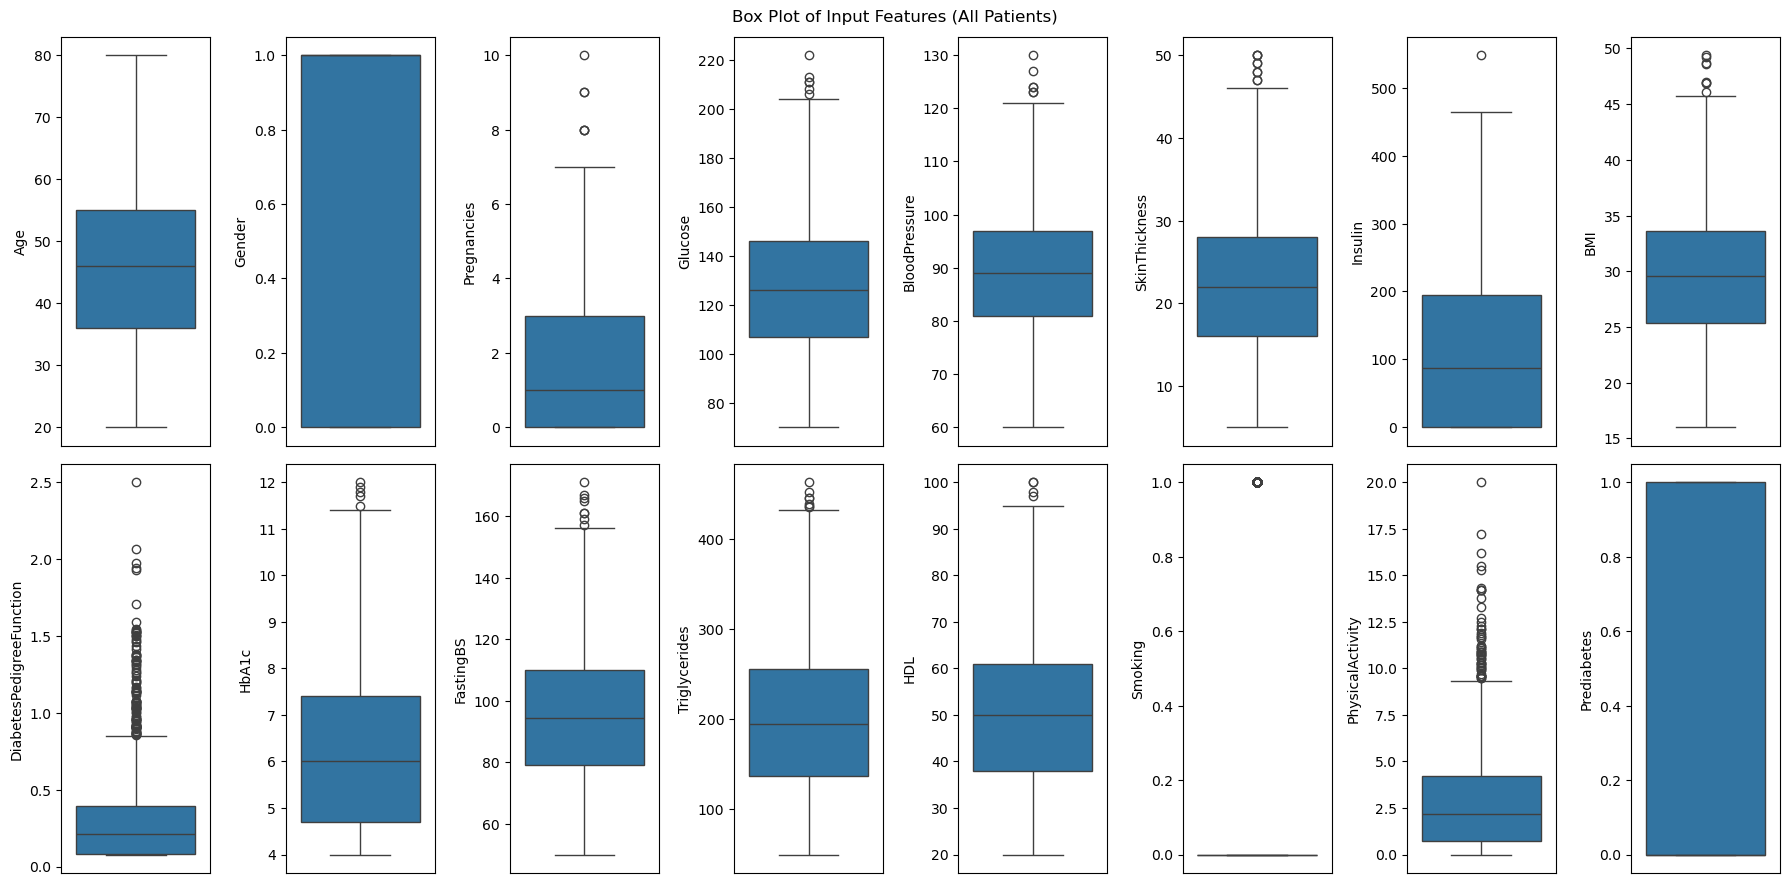

In [14]:
# Drop the output column
features = df.columns[:-1]

# Box Plot
# --------

plt.figure(figsize=(18, 9))

for i, col in enumerate(features, 1):
    plt.subplot(2, math.ceil(len(features) / 2), i)
    sns.boxplot(data=df, y=col)
    plt.xlabel('')  # Hide x-axis label
    plt.ylabel(col)  # Hide y-axis label
    plt.xticks([])  # Remove x-axis ticks

plt.suptitle("Box Plot of Input Features (All Patients)")

plt.tight_layout()

plt.savefig("task_2a_boxplot_all_features")
plt.show()

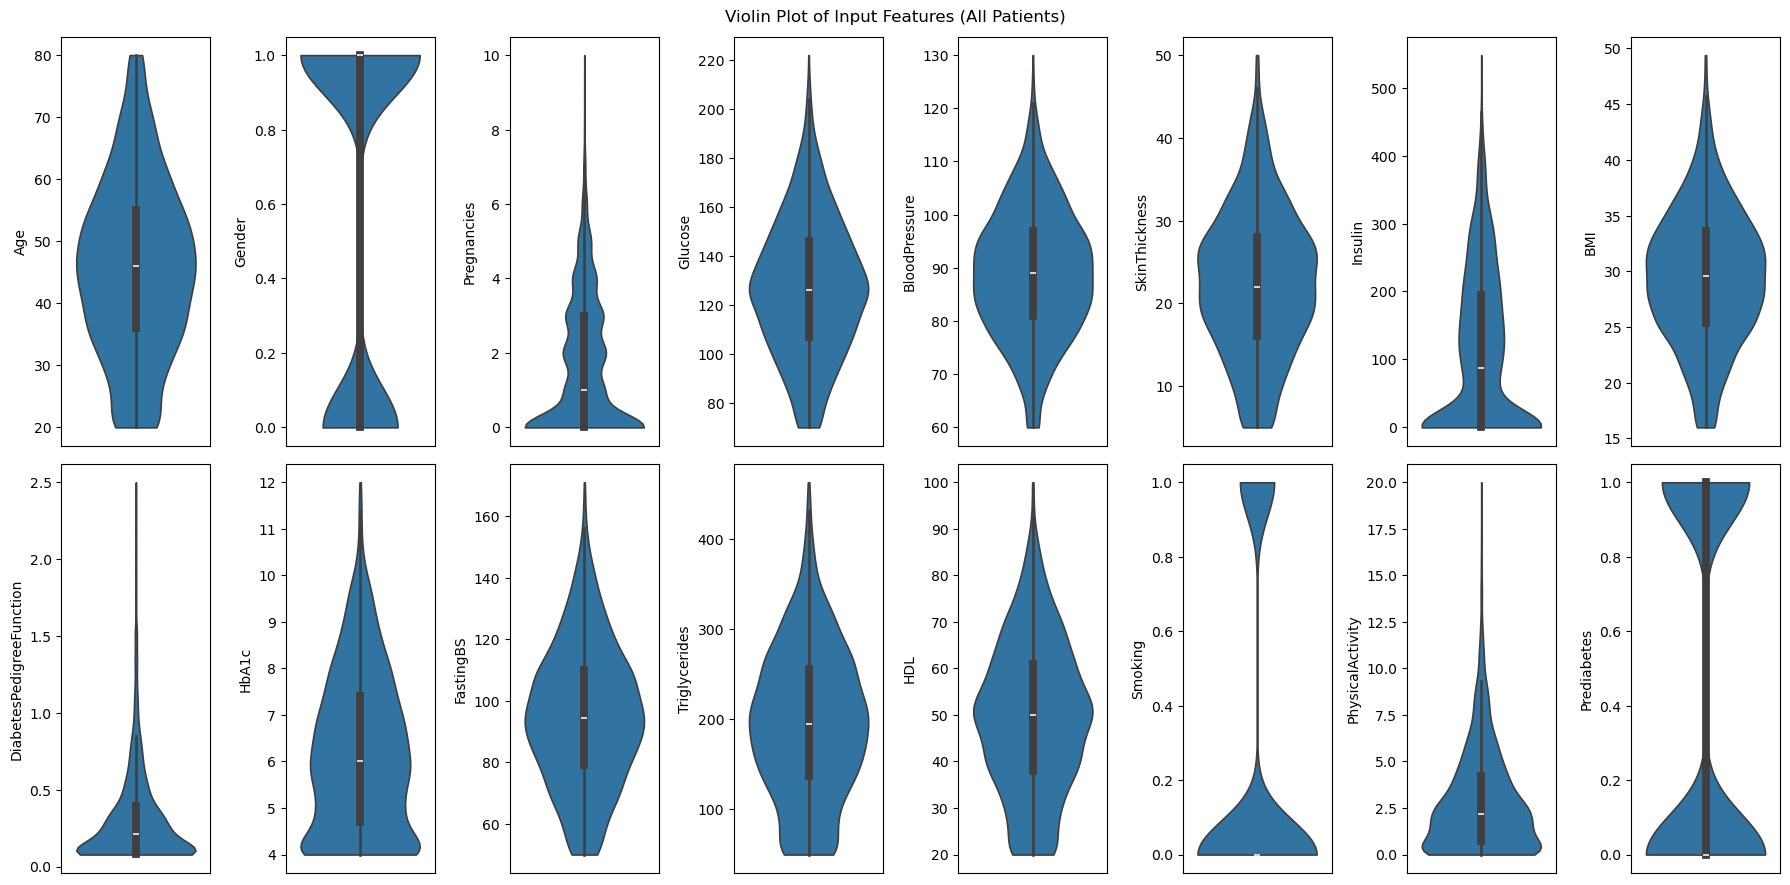

In [30]:
# Violin Plot
# -----------

plt.figure(figsize=(18, 9))

for i, col in enumerate(features, 1):
    plt.subplot(2, math.ceil(len(features) / 2), i)
    sns.violinplot(data=df, y=col, cut=0)
    plt.xlabel('')  # Hide x-axis label
    plt.ylabel(col)  # Hide y-axis label
    plt.xticks([])  # Remove x-axis ticks

plt.suptitle("Violin Plot of Input Features (All Patients)")

plt.tight_layout()

plt.savefig("task_2b_violinplot_all_features")
plt.show()

C:\Users\Alkaff\AppData\Local\Temp\ipykernel_28460\520195518.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Diabetes', y=col, palette='Set2') # Plots Diabetes outcome in x axis
C:\Users\Alkaff\AppData\Local\Temp\ipykernel_28460\520195518.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Diabetes', y=col, palette='Set2') # Plots Diabetes outcome in x axis
C:\Users\Alkaff\AppData\Local\Temp\ipykernel_28460\520195518.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Diabetes', y=col, palette='Set2') 

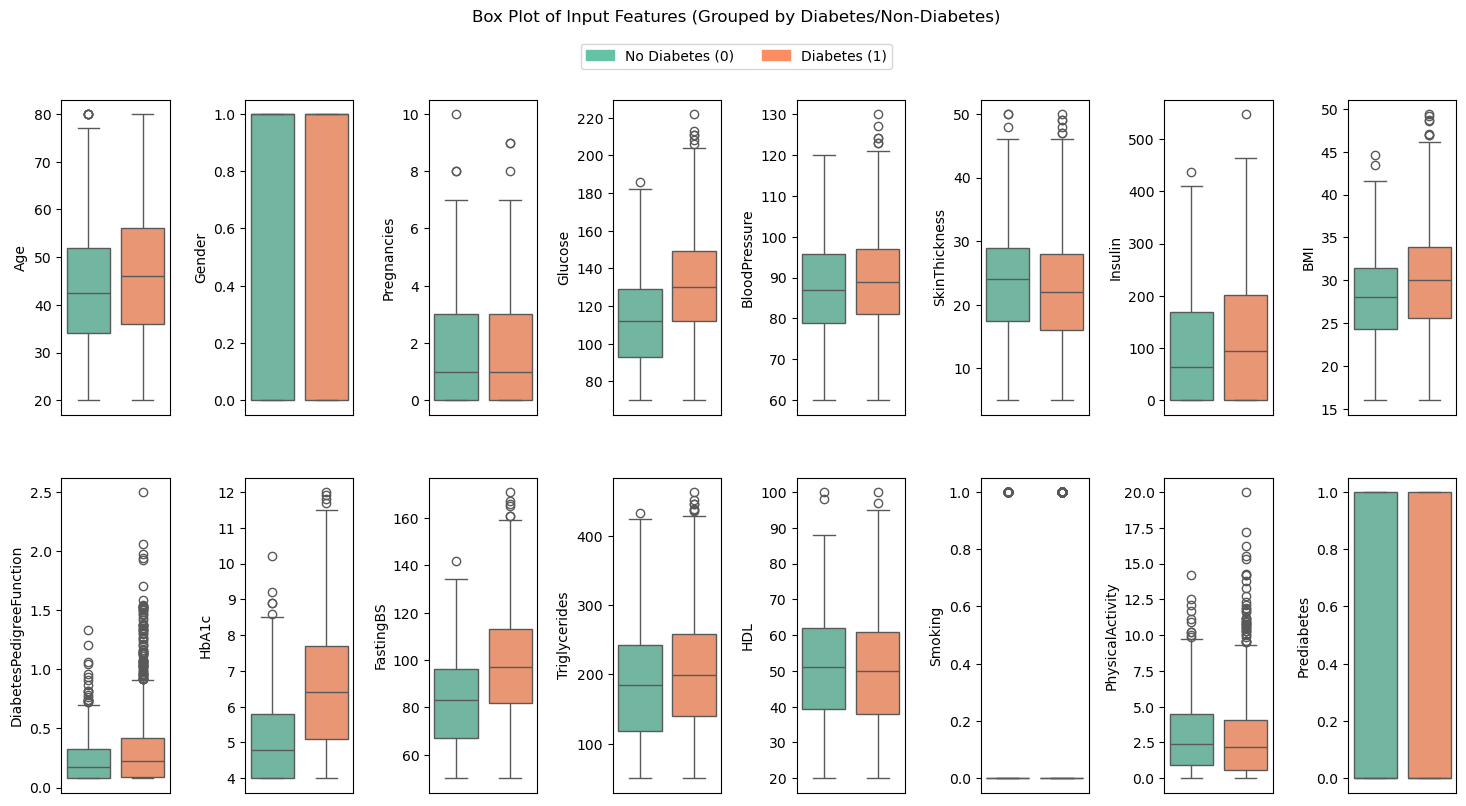

In [29]:
# Box Plot (Grouped by Diabetes)
# ------------------------------

plt.figure(figsize=(18, 9))

for i, col in enumerate(features, 1):
    plt.subplot(2, math.ceil(len(features) / 2), i)
    
    # Plots Diabetes outcome in x axis
    sns.boxplot(data=df, 
                x='Diabetes', 
                y=col, 
                palette='Set2')
    
    plt.xlabel('')  # Hide x-axis label
    plt.ylabel(col)  # Hide y-axis label
    plt.xticks([])  # Remove x-axis ticks

plt.suptitle("Box Plot of Input Features (Grouped by Diabetes/Non-Diabetes)")
plt.subplots_adjust(wspace=0.7)

# Global Legend
colors = sns.color_palette('Set2', 2)
handles = [
    mpatches.Patch(color=colors[0], label='No Diabetes (0)'),
    mpatches.Patch(color=colors[1], label='Diabetes (1)')
]
plt.figlegend(handles=handles, loc='upper center', ncol=2, bbox_to_anchor=(0.5, 0.95))

plt.savefig("task_2c_boxplot_all_features_grouped")
plt.show()

C:\Users\Alkaff\AppData\Local\Temp\ipykernel_28460\3609729530.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df,
C:\Users\Alkaff\AppData\Local\Temp\ipykernel_28460\3609729530.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df,
C:\Users\Alkaff\AppData\Local\Temp\ipykernel_28460\3609729530.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df,
C:\Users\Alkaff\AppData\Local\Temp\ipykernel_28460\3609729530.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v

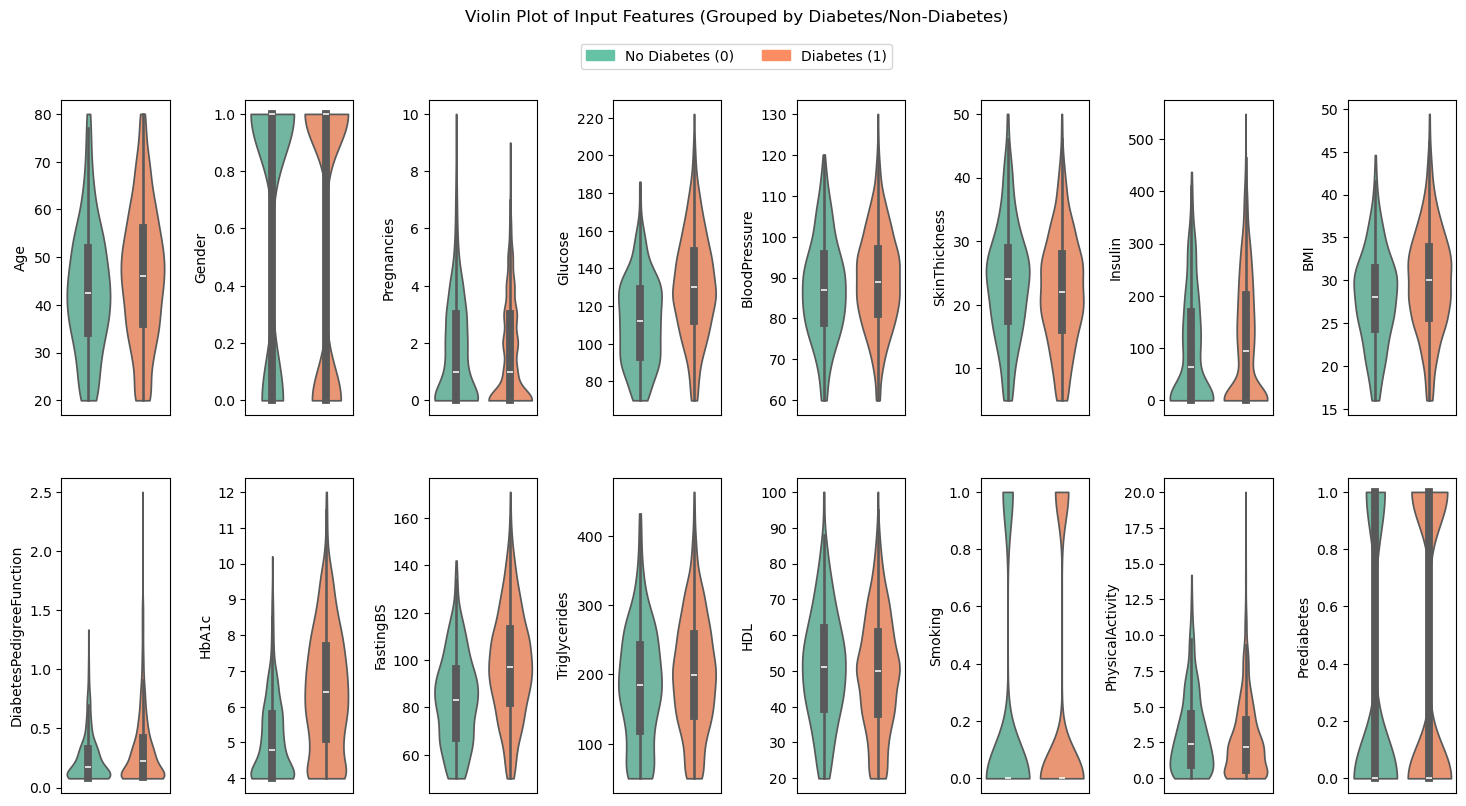

In [39]:
# Violin Plot (Grouped by Diabetes)
# ---------------------------------

plt.figure(figsize=(18, 9))

for i, col in enumerate(features, 1):
    plt.subplot(2, math.ceil(len(features) / 2), i)
    
    # Plots Diabetes outcome in x axis
    sns.violinplot(data=df, 
                   x='Diabetes', 
                   y=col, 
                   palette='Set2', 
                   cut=0) 
    
    plt.xlabel('')  # Hide x-axis label
    plt.ylabel(col)  # Hide y-axis label
    plt.xticks([])  # Remove x-axis ticks

plt.suptitle("Violin Plot of Input Features (Grouped by Diabetes/Non-Diabetes)")
plt.subplots_adjust(wspace=0.7)

# Global Legend
colors = sns.color_palette('Set2', 2)
handles = [
    mpatches.Patch(color=colors[0], label='No Diabetes (0)'),
    mpatches.Patch(color=colors[1], label='Diabetes (1)')
]
plt.figlegend(handles=handles, loc='upper center', ncol=2, bbox_to_anchor=(0.5, 0.95))

plt.savefig("task_2d_violinplot_all_features_grouped")
plt.show()

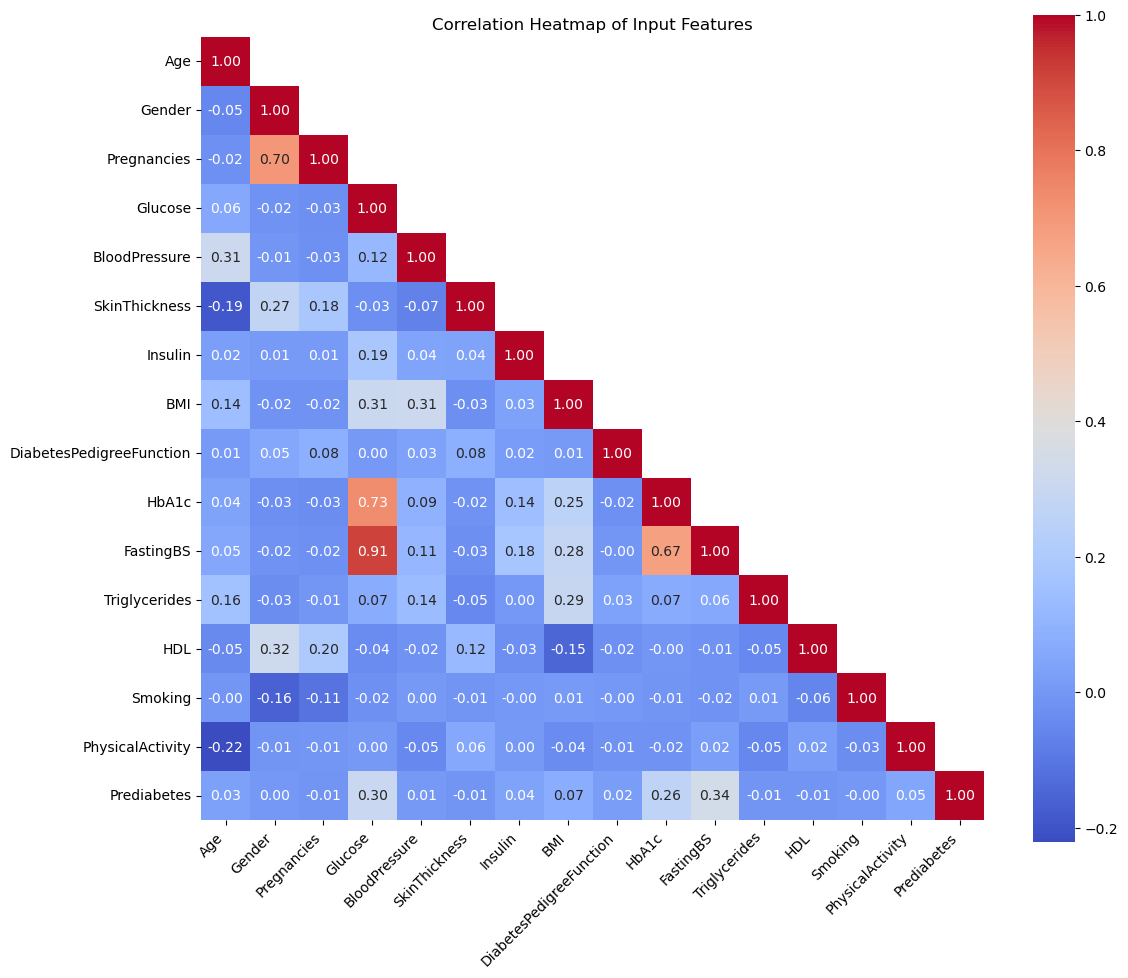

In [35]:
# Correlation Heatmap
# -------------------

# Correlation Matrix
corr_matrix = df.drop(columns='Diabetes').corr()

# Plot
plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap="coolwarm", 
            square=True, 
            cbar=True, 
            mask=np.triu(corr_matrix, k=1))

# Title and display
plt.title("Correlation Heatmap of Input Features")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.savefig("task_2e_corr_heatmap")
plt.show()

C:\Users\Alkaff\AppData\Local\Temp\ipykernel_28460\547187930.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance',


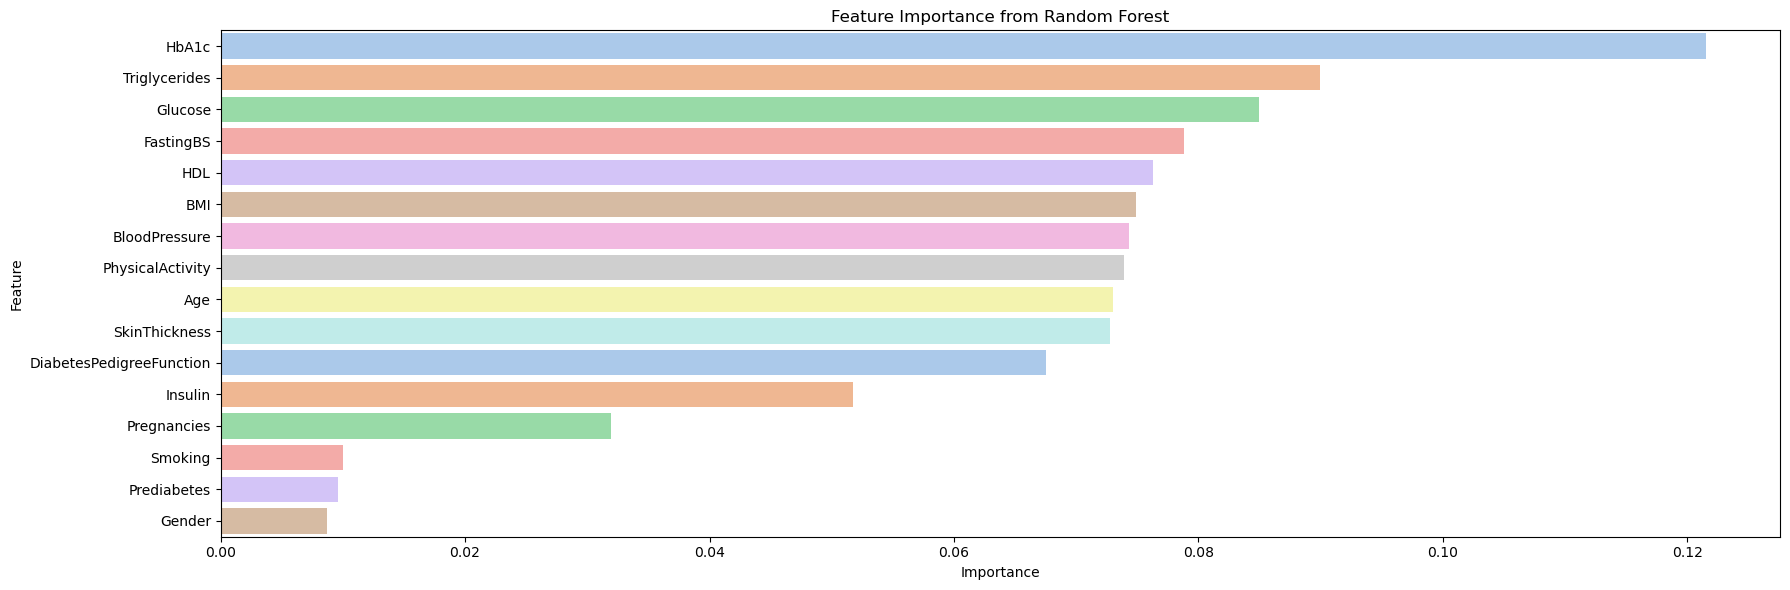

In [38]:
# Visualise Feature Importance
# ----------------------------

X = df.drop(columns='Diabetes')
y = df['Diabetes']

# Train Random Forest
rf = RandomForestClassifier(random_state=1)
rf.fit(X, y)

# Feature Importances
importances = rf.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df.sort_values(by='Importance', ascending=False, inplace=True)

# Bar Plot
plt.figure(figsize=(18, 6))

sns.barplot(x='Importance', 
            y='Feature', 
            data=feat_imp_df, 
            palette='pastel')

plt.title('Feature Importance from Random Forest')

plt.tight_layout()
plt.savefig("task_2f_feature_importance")
plt.show()

### 🔍 Exploratory Data Analysis (EDA) Insights

#### 📦 Distribution Analysis (Box & Violin Plots)

- Most features exhibit a **wide range of values** with visible outliers, especially in `Insulin`, `SkinThickness`, and `Triglycerides`, suggesting possible skewness and a need for normalization or robust models.
- The **`Gender` feature** appears imbalanced, with **more samples labeled as 1** (females), indicating a potential class skew that should be monitored during modeling.
- Distributions of key health markers such as `Glucose`, `BMI`, `HbA1c`, and `FastingBS` are **right-skewed**, which is common in clinical datasets.

#### 📊 Grouped Distribution by Diabetes Outcome

From the grouped box and violin plots comparing diabetic and non-diabetic patients, we can infer that individuals with diabetes tend to have:

- Higher median age
- Higher glucose levels
- Lower skin thickness
- Higher BMI
- Higher HbA1c levels
- Higher Fasting Blood Sugar (FastingBS)

These differences suggest that these features may be strong predictors of diabetes and should be emphasized during feature selection and modeling.

#### 🔥 Correlation Heatmap

- Strong positive correlations:
  - `FastingBS` and `Glucose` (**r ≈ 0.91**)
  - `HbA1c` and `Glucose` (**r ≈ 0.73**)
  - `HbA1c` and `FastingBS` (**r ≈ 0.67**)
- Most other features exhibit **weak correlations**, indicating **low multicollinearity**, which is beneficial for many machine learning models.

#### ⭐ Feature Importance (Random Forest)

- The most influential features based on Random Forest importance scores include:
  - `HbA1c`, `Triglycerides`, `Glucose`, and `FastingBS` — all strongly associated with blood sugar control and diabetes diagnosis.
  - Other contributing features include `HDL`, `BMI`, and `BloodPressure`.
- Features such as `Gender`, `Smoking`, and `Prediabetes` showed **low importance**, suggesting limited predictive power in this dataset.


## 📌 Task 3: Analyse data quality

- Check for missing or zero values (particularly in SkinThickness, Insulin, and BMI)
  1. Create the 2 dataframes
  2. Plot a barchart to visualize the missing and zero values
- Identify and handle outliers


In [54]:
# Missing Values
# --------------

null_counts = X.isnull().sum()

# Filter only columns with null values
null_counts = null_counts[null_counts > 0]

null_df = null_counts.reset_index()
null_df.columns = ['Feature', 'Null Count']

null_df

,Feature,Null Count
0,BloodPressure,98
1,SkinThickness,86
2,Triglycerides,91
3,HDL,96
4,PhysicalActivity,101


In [55]:
# Zero Values
# -----------

valid_zero_cols = ['Gender', 'Pregnancies', 'Smoking', 'Prediabetes', 'PhysicalActivity']
invalid_zero_cols = [col for col in X.columns if col not in valid_zero_cols]

zero_df = pd.DataFrame({
    'Feature': invalid_zero_cols,
    'Zero Count': [X[col].eq(0).sum() for col in invalid_zero_cols]
})

# Filter only columns with zero values
zero_df = zero_df[zero_df["Zero Count"] > 0]
zero_df


,Feature,Zero Count
4,Insulin,737


C:\Users\Alkaff\AppData\Local\Temp\ipykernel_28460\2152045909.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0],
C:\Users\Alkaff\AppData\Local\Temp\ipykernel_28460\2152045909.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1],


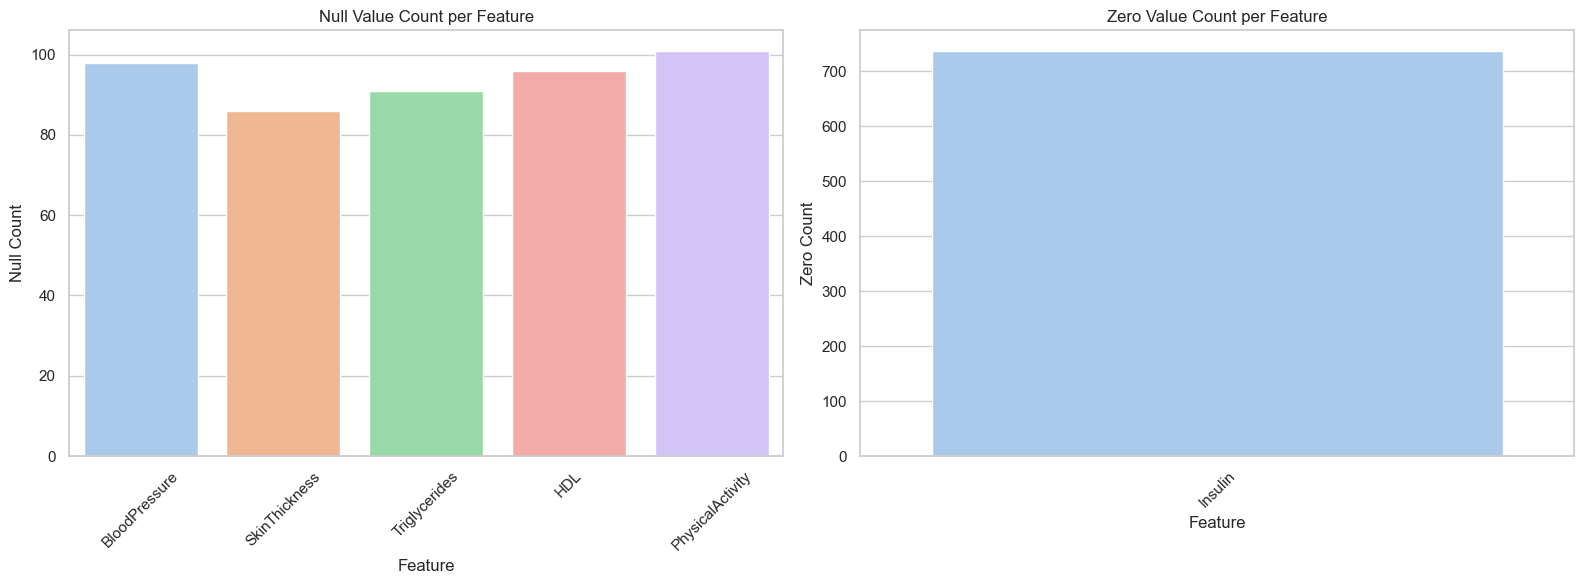

In [56]:
# Plot
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Null Values
sns.barplot(ax=axes[0], 
            data=null_df, 
            x='Feature', 
            y='Null Count', 
            palette='pastel')

axes[0].set_title("Null Value Count per Feature")
axes[0].tick_params(axis='x', rotation=45)

# Zero Values
sns.barplot(ax=axes[1], 
            data=zero_df, 
            x='Feature', 
            y='Zero Count', 
            palette='pastel')

axes[1].set_title("Zero Value Count per Feature")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig("task_3a_data_quality_plot")
plt.show()

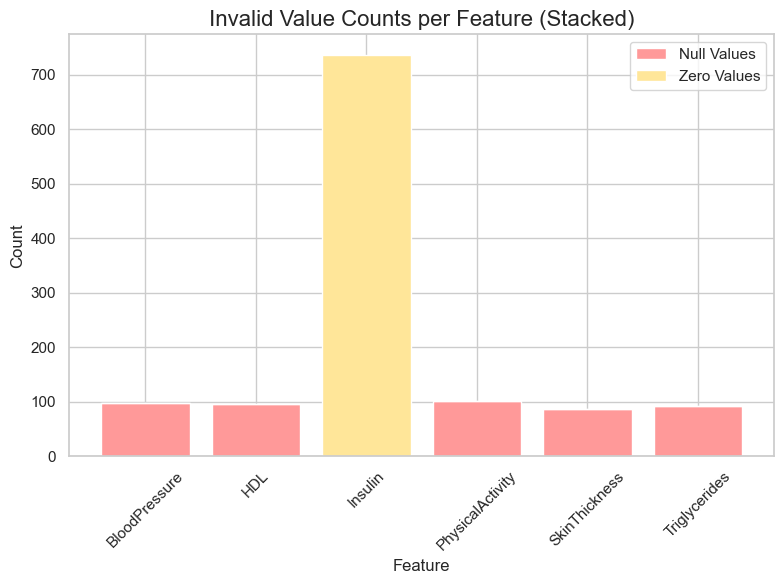

In [58]:
# Combined Plot for Null and Zero

merged_df = pd.merge(null_df, zero_df, on='Feature', how='outer').fillna(0)

# Ensure counts are integers
merged_df['Null Count'] = merged_df['Null Count'].astype(int)
merged_df['Zero Count'] = merged_df['Zero Count'].astype(int)

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Plot stacked bars
plt.bar(merged_df['Feature'], 
        merged_df['Null Count'], 
        label='Null Values', 
        color='#FF9999')

plt.bar(merged_df['Feature'], 
        merged_df['Zero Count'], 
        bottom=merged_df['Null Count'], # For stacking
        label='Zero Values', 
        color='#FFE699')

# Titles and labels
plt.title("Invalid Value Counts per Feature (Stacked)", fontsize=16)
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.savefig("task_3b_data_quality_combined_plot")
plt.show()

### 🔍 Data Quality Insights and Handling Strategy

#### 📊 Missing and Zero Value Analysis

From the bar charts above, we observed two types of data quality issues:
- **Null values** are present in the following features: `BloodPressure`, `HDL`, `SkinThickness`, `Triglycerides`, and `PhysicalActivity`.
- **Zero values** are most significant in the `Insulin` feature, with over **700 entries** containing the value `0`, which is medically implausible for a living patient.

Such zero values should be treated as **missing data** rather than valid inputs.

#### 🧠 Interpretation

- Zero values in `Insulin` can mislead the model by suggesting that extremely low insulin levels are associated with specific outcomes.
- Leaving null or zero values untreated could impair feature scaling and model performance.
- Dropping rows with missing or zero values would lead to **substantial data loss**, particularly for `Insulin`.
- **Outliers are expected** in medical datasets and can represent meaningful clinical variations; hence, they will be **retained** to preserve data authenticity.

#### 🚀 Action

To maintain data integrity and avoid unnecessary data loss:
- All **null values** in the affected features will be **imputed using the median**.
- All **zero values in `Insulin`** will be treated as missing (`NaN`) and then **imputed with the median** of the valid non-zero values.
- **Outliers will be kept** to reflect the natural spread and variability in patient data.

This approach ensures the model is trained on realistic and statistically appropriate data while preserving the dataset size and integrity.


In [60]:
# Treating Invalid Values
# -----------------------

# Insulin = 0 is invalid
X['Insulin'] = X['Insulin'].replace(0, np.nan)

# SimpleImputer
features_to_impute = ['BloodPressure', 'HDL', 'SkinThickness', 'Triglycerides', 'PhysicalActivity', 'Insulin']
imputer = SimpleImputer(strategy='median')
X[features_to_impute] = imputer.fit_transform(X[features_to_impute])

X.head()

,Age,Gender,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,HbA1c,FastingBS,Triglycerides,HDL,Smoking,PhysicalActivity,Prediabetes
0,52,1,1,124,95.0,20.0,164.0,36.0,0.078,4.7,87,142.0,37.0,0,3.3,0
1,43,1,2,144,86.0,23.0,3.0,32.9,0.118,6.3,135,162.0,89.0,0,5.2,1
2,55,1,4,141,113.0,18.0,297.0,43.4,0.139,5.4,113,180.0,45.0,1,0.0,1
3,68,1,3,125,110.0,32.0,210.0,22.7,0.197,5.2,93,262.0,56.0,0,4.1,0
4,41,0,0,177,92.0,14.0,189.0,38.1,0.078,10.5,126,332.0,66.0,0,3.8,0


In [61]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       2000 non-null   int64  
 1   Gender                    2000 non-null   int64  
 2   Pregnancies               2000 non-null   int64  
 3   Glucose                   2000 non-null   int64  
 4   BloodPressure             2000 non-null   float64
 5   SkinThickness             2000 non-null   float64
 6   Insulin                   2000 non-null   float64
 7   BMI                       2000 non-null   float64
 8   DiabetesPedigreeFunction  2000 non-null   float64
 9   HbA1c                     2000 non-null   float64
 10  FastingBS                 2000 non-null   int64  
 11  Triglycerides             2000 non-null   float64
 12  HDL                       2000 non-null   float64
 13  Smoking                   2000 non-null   int64  
 14  Physical

In [62]:
X.describe()

,Age,Gender,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,HbA1c,FastingBS,Triglycerides,HDL,Smoking,PhysicalActivity,Prediabetes
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,45.858500,0.614000,1.557000,127.156000,89.005000,22.528000,170.750500,29.493850,0.304637,6.179000,95.090000,196.449000,49.648500,0.222500,2.816450,0.422500
std,14.155164,0.486952,1.758208,28.018051,11.818875,8.651453,77.543276,6.038741,0.289355,1.705257,22.969343,81.368125,15.838478,0.416029,2.689422,0.494081
min,20.000000,0.000000,0.000000,70.000000,60.000000,5.000000,1.000000,16.000000,0.078000,4.000000,50.000000,50.000000,20.000000,0.000000,0.000000,0.000000
25%,36.000000,0.000000,0.000000,107.000000,81.000000,17.000000,136.000000,25.400000,0.083750,4.700000,79.000000,140.000000,39.000000,0.000000,0.700000,0.000000
50%,46.000000,1.000000,1.000000,126.000000,89.000000,22.000000,164.000000,29.550000,0.213000,6.000000,94.500000,195.000000,50.000000,0.000000,2.200000,0.000000
75%,55.000000,1.000000,3.000000,146.000000,97.000000,28.000000,195.000000,33.600000,0.391250,7.400000,110.000000,252.000000,60.000000,0.000000,4.000000,1.000000
max,80.000000,1.000000,10.000000,222.000000,130.000000,50.000000,548.000000,49.400000,2.500000,12.000000,171.000000,463.000000,100.000000,1.000000,20.000000,1.000000


## 📌 Task 4: Prepare Features and Target Variable

- Split data into features (X) and target (y)
  - Already done at Task 2 part: Visualise Feature Importance
- Normalise/standardise features
  - Used `StandardScaler()`


In [63]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.43397844,  0.79288366, -0.316879  , ..., -0.53495199,
         0.17984196, -0.8553372 ],
       [-0.20199094,  0.79288366,  0.25202405, ..., -0.53495199,
         0.88649014,  1.16912955],
       [ 0.64596824,  0.79288366,  1.38983014, ...,  1.86932662,
        -1.04749435,  1.16912955],
       ...,
       [-0.97928686, -1.26121908, -0.88578204, ..., -0.53495199,
         1.66752233,  1.16912955],
       [-0.20199094,  0.79288366,  0.25202405, ..., -0.53495199,
         1.10964219, -0.8553372 ],
       [-0.83796033, -1.26121908, -0.88578204, ...,  1.86932662,
         0.51457004,  1.16912955]])

## 📌 Task 5: Class Imbalance and Dataset Splitting

- Handle class imbalance if present (using techniques like SMOTE or class weights).
   - You may use this link as reference for help with this sub-task -[https://www.turing.com/kb/smote-for-an-imbalanced-dataset](https://www.turing.com/kb/smote-for-an-imbalanced-dataset).
- Split data into training (70%), validation (15%), and test (15%) sets


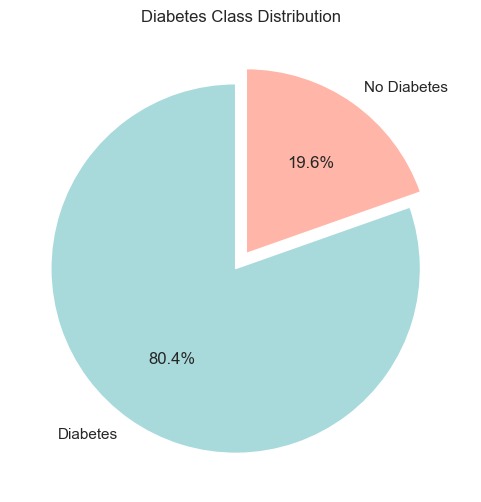

In [69]:
# Check for Class Imbalance
# -------------------------

class_counts = y.value_counts()

# Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts, 
        labels=class_counts.index.map({0: 'No Diabetes', 1: 'Diabetes'}),
        autopct='%1.1f%%', 
        startangle=90,
        colors=['#A8DADC', '#FFB5A7'],  # pastel teal and pastel pink
        explode=(0.05, 0.05))  # separate the slices slightly

plt.title('Diabetes Class Distribution')
plt.show()

In [75]:
# Train-Test-Val Split
# --------------------

# 70% train and 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.30, stratify=y, random_state=0)

# 15% val and 15% test (from temp split 50/50)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=0)

print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")
print(f"Train: {y_train.shape}, Val: {y_val.shape}, Test: {y_test.shape}")


Train: (1400, 16), Val: (300, 16), Test: (300, 16)
Train: (1400,), Val: (300,), Test: (300,)


In [76]:
# SMOTE
# -----

smote = SMOTE(random_state=0)

# Apply SMOTE to the training data only
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(np.unique(y_train_smote, return_counts=True))


(array([0, 1], dtype=int64), array([1126, 1126], dtype=int64))


C:\Users\Alkaff\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\Alkaff\anaconda3\envs\tf\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Alkaff\anaconda3\envs\tf\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\Alkaff\anaconda3\envs\tf\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) a

## 📌 Task 6: Design an Appropriate DCNN-based Architecture

- Determine appropriate number of layers and neurons
- Select suitable activation functions for hidden and output layers
- OPTIONAL - Justify your architectural choices 


In [84]:
# Model
# -----

model = Sequential()

# Input Layer
model.add(InputLayer(input_shape=(X_train_smote.shape[1], 1)))  # (features, channels)

model.add(Conv1D(filters=32, kernel_size=2, activation='relu', padding='same')) # Conv1D
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', padding='same')) # Conv1D
model.add(GlobalAveragePooling1D())# Global Pooling
model.add(Dense(64, activation='relu'))# Dense Layer

# Output Layer
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 16, 32)            96        
                                                                 
 conv1d_7 (Conv1D)           (None, 16, 64)            4160      
                                                                 
 global_average_pooling1d_1   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,481
Trainable params: 8,481
Non-trainable params: 0
____________________________________________________

### 🧠 Justification - Model Architecture Choices

**Input Shape and 1D Convolution Choice**

- Our dataset consists of tabular, structured data with no time-series dependencies.
- Although Conv1D is traditionally used for sequential/time-series data, applying 1D convolutions over feature dimensions has been shown to improve feature extraction and introduce mild spatial inductive bias — helpful even for structured datasets.
- Thus, Conv1D was selected, treating features as a "pseudo-sequence."

**Layer and Filter Choices**

- First Conv1D Layer (32 filters) and Second Conv1D Layer (64 filters) are standard practice: starting small and increasing filters allows the network to progressively learn higher-level feature interactions.
- A smaller kernel size of 2 was chosen to focus on pairwise interactions between features (e.g., Glucose & BMI)
- A larger kernel size (e.g., 3 or more) was not used because the features are mostly independent or pairwise in nature - very few relationship beteen features
- Padding = 'same' ensures the output dimensions remain manageable without shrinking too fast.
- A Dense layer with 64 neurons acts as a powerful classifier over the features extracted by the convolution layers.

**GlobalAveragePooling1D preferred over GlobalMaxPooling1D**

- Smooths out noise rather than amplifying spikes, which is important for noisy medical datasets.
- Generalizes better on smaller datasets by considering the *average presence* of features instead of only the strongest activation.
- Reduces sensitivity to outliers which is ideal since medical datasets often have extreme values.
- Captures overall feature patterns matching the goal of assessing a patient's overall health profile rather than reacting to a single extreme value.
- More interpretable and stable in clinical and biomedical machine learning applications.

**Dropout Regularisation**

- Dropout(0.3) after each Conv1D layer and Dropout(0.5) after Dense layer are added to prevent overfitting, which is crucial given the small to medium dataset size (~2,200+ samples after SMOTE).
- Higher dropout (0.5) is used before the final Dense layer to encourage robust feature learning.

**Output Layer and Activation Functions**

- ReLU activation is used throughout hidden layers because it is computationally efficient and reduces vanishing gradient problems.
- Sigmoid activation is used in the final Dense layer because the task is binary classification (Diabetes: Yes/No).


## 📌 Task 7: Configure the Training Process

- Select appropriate loss function and evaluation metrics
- Choose optimiser and learning rate
- Implement regularisation techniques (dropout, L1/L2) to prevent overfitting
- Initialise and compile the model
- OPTIONAL - Justify your parameter choices


In [87]:
# Model
# -----

model = Sequential()

# Input Layer
model.add(InputLayer(input_shape=(X_train_smote.shape[1], 1)))  # (features, channels)

# 1st Conv1D Block
model.add(Conv1D(
    filters=32,
    kernel_size=2,
    activation='relu',
    padding='same',
    kernel_regularizer=regularizers.l2(0.001)
))
model.add(Dropout(0.3))

# 2nd Conv1D Block
model.add(Conv1D(
    filters=64,
    kernel_size=2,
    activation='relu',
    padding='same',
    kernel_regularizer=regularizers.l2(0.001)
))
model.add(Dropout(0.3))

# Global Pooling
model.add(GlobalAveragePooling1D())

# Dense Layer
model.add(Dense(
    64,
    activation='relu',
    kernel_regularizer=regularizers.l2(0.001)
))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 16, 32)            96        
                                                                 
 dropout_8 (Dropout)         (None, 16, 32)            0         
                                                                 
 conv1d_9 (Conv1D)           (None, 16, 64)            4160      
                                                                 
 dropout_9 (Dropout)         (None, 16, 64)            0         
                                                                 
 global_average_pooling1d_2   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                      

### 🧠 Justification - Training Configuration Choices

**Loss Function – binary_crossentropy**

- Our target variable is binary (Diabetes: 0 or 1) and `binary_crossentropy` is the standard loss function for binary classification problems.
- It measures the distance between actual and predicted probabilities, penalizing incorrect confident predictions.

**Evaluation Metric – accuracy**

- Why? Accuracy is intuitive and interpretable, showing the percentage of correct predictions.
- Since class imbalance has already been addressed via SMOTE, accuracy remains a reliable performance measure.

**Optimiser – Adam**

- Combines the benefits of AdaGrad (adaptive learning rates) and RMSProp (momentum).
- Well-suited for deep learning problems and converges faster than SGD in most practical scenarios.

**Learning Rate – 0.001**

- A default and reliable starting point for Adam recommended by the TensorFlow/Keras community.
- Prevents overshooting the minima while ensuring steady progress during backpropagation.

**Regularisation – L2 (`kernel_regularizer=l2(0.001)`)**

- Helps prevent overfitting by penalising large weights.
- Encourages the model to keep weights small, improving generalisation on unseen data.

**Dropout Layers**
- Introduced after each Conv1D and Dense layer to further combat overfitting.
- Forces the network to not rely on any one node, encouraging redundancy and robustness.


## 📌 Task 8: Train the model with Appropriate Batch Size and Number of Epochs


In [88]:
BATCH_SIZE = 32
NO_OF_EPOCH = 100

### 📦 Batch Size and Epochs Selection

**Batch Size (32):**
- A batch size of 32 provides a balance between training stability and computational efficiency, especially suitable for our moderate dataset size (~2250 samples).

**Epochs (100):**
- 100 epochs give the model sufficient opportunity to learn. With EarlyStopping implemented, training will halt once convergence is achieved, preventing unnecessary overfitting.


## 📌 Task 9: Implement Callbacks

- Early stopping to prevent overfitting
- Model checkpointing to save the best model
- Learning rate scheduling if appropriate


### Callback Strategies: `EarlyStopping` and `ReduceLROnPlateau`

---

#### ⏹️ EarlyStopping

**🔧 What it does**  
`EarlyStopping` monitors a selected performance metric (e.g., validation loss) and **terminates training** when the metric has stopped improving for a specified number of epochs (`patience`). This helps prevent **overfitting** and saves computational time.

**❓ Why it’s used here**  
Since we're training on a medical dataset with limited data, prolonged training may lead to overfitting. `EarlyStopping` ensures that we stop once no meaningful gains are seen on the validation set.

**❌ What happens if we remove it**  
- Training may continue even after the model has stopped improving.
- Risk of **overfitting** and **wasting resources** on unproductive epochs.

**✅ What happens if we include it**  
- Prevents overfitting by halting training at the right time.
- Reduces total training time, improving efficiency.

---

#### 📉 ReduceLROnPlateau

**🔧 What it does**  
`ReduceLROnPlateau` lowers the learning rate when a monitored metric (e.g., validation loss) has **plateaued**, allowing the model to make **finer updates** to the weights.

**❓ Why it’s used here**  
Our model might hit a performance plateau during training. Reducing the learning rate dynamically can help it **break out of local minima** and continue optimizing.

**❌ What happens if we remove it**  
- Model may fail to escape plateaus in performance.
- Learning rate may remain too high, preventing finer convergence.

**✅ What happens if we include it**  
- Adaptive learning rate helps **fine-tune the model**.
- Increases chances of achieving better generalization.

---

#### 🔁 Combining Strategies

| Scenario                      | Outcome                                                                 |
|------------------------------|-------------------------------------------------------------------------|
| **Only `EarlyStopping`**     | Stops training early, but may miss improvements that need a smaller LR. |
| **Only `ReduceLROnPlateau`** | Adjusts learning rate, but could train too long and overfit.            |
| **Both Used** ✅              | Optimal setup: adaptive learning + safe early stopping.                 |

---

Including both **maximizes efficiency and model performance**, especially in tasks like ours where **overfitting and plateauing** are common concerns.


In [90]:
# Implement Callbacks
# -------------------

# Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    restore_best_weights=True,
    verbose=1
)

# Model Checkpoint
model_checkpoint = ModelCheckpoint(
    filepath='best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Reduce LR On Plateau
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.5, 
    patience=5, 
    min_lr=1e-6,
    verbose=1
)

In [91]:
# Training the Model
# ------------------

history = model.fit(
    X_train_smote, y_train_smote,
    validation_data=(X_val, y_val),
    epochs=NO_OF_EPOCH,
    batch_size=BATCH_SIZE,
    callbacks=[early_stopping, model_checkpoint, reduce_lr],
    verbose=1
)

Epoch 1/100
71/71 [==============================] - ETA: 0s - loss: 0.7574 - accuracy: 0.5915   
Epoch 1: val_loss improved from inf to 0.71609, saving model to best_model.h5
71/71 [==============================] - 35s 10ms/step - loss: 0.7574 - accuracy: 0.5915 - val_loss: 0.7161 - val_accuracy: 0.6367 - lr: 0.0010
Epoch 2/100
58/71 [=======================>......] - ETA: 0s - loss: 0.7064 - accuracy: 0.6379
Epoch 2: val_loss improved from 0.71609 to 0.65828, saving model to best_model.h5
71/71 [==============================] - 0s 5ms/step - loss: 0.7005 - accuracy: 0.6488 - val_loss: 0.6583 - val_accuracy: 0.6467 - lr: 0.0010
Epoch 3/100
62/71 [=========================>....] - ETA: 0s - loss: 0.6766 - accuracy: 0.6593
Epoch 3: val_loss did not improve from 0.65828
71/71 [==============================] - 0s 4ms/step - loss: 0.6792 - accuracy: 0.6559 - val_loss: 0.6887 - val_accuracy: 0.5767 - lr: 0.0010
Epoch 4/100
71/71 [==============================] - ETA: 0s - loss: 0.6700 -

In [94]:
print(history.history)

{'loss': [0.7574048042297363, 0.700511634349823, 0.6791662573814392, 0.6700088381767273, 0.6638458967208862, 0.6595490574836731, 0.6537044048309326, 0.6461730003356934, 0.6439474821090698, 0.6419304013252258, 0.6417921781539917, 0.6401910781860352, 0.6352691054344177, 0.6385983228683472, 0.6343073844909668, 0.6375290155410767, 0.6351068019866943, 0.6354314684867859, 0.6296302676200867, 0.6302816271781921, 0.6276689767837524, 0.6289545893669128, 0.626332700252533, 0.6276561617851257], 'accuracy': [0.5914742350578308, 0.6487566828727722, 0.6558614373207092, 0.653197169303894, 0.6634103059768677, 0.6563054919242859, 0.653197169303894, 0.6611900329589844, 0.661634087562561, 0.6691829562187195, 0.6496447324752808, 0.6540852785110474, 0.6625221967697144, 0.654529333114624, 0.6607459783554077, 0.6594138741493225, 0.6536412239074707, 0.6589698195457458, 0.6603019833564758, 0.661634087562561, 0.6745115518569946, 0.661634087562561, 0.6620781421661377, 0.6603019833564758], 'val_loss': [0.71609145

### 📊 Training Summary and Convergence Analysis

- The model training **stopped at epoch 24** due to `EarlyStopping`, which restores the **best weights from epoch 14**.
- During training:
  - Validation loss initially decreased, hitting a low of **0.5973** at epoch 14.
  - After that, it started fluctuating, and no further improvement was seen for the next 10 epochs.
  - `ReduceLROnPlateau` was triggered at epoch 19, reducing the learning rate to encourage finer convergence.
- Final metrics at best epoch:
  - **Validation Accuracy**: ~67.67%
  - **Validation Loss**: ~0.5973
- The combination of `EarlyStopping` and `ReduceLROnPlateau` ensured that the model did **not overfit**, and **learning rate adjustments helped optimize** training performance.


## 📌 Task 10: Visualise the Training Process:

- Plot training and validation loss
- Plot training and validation accuracy
- Analyse convergence and potential overfitting/underfitting


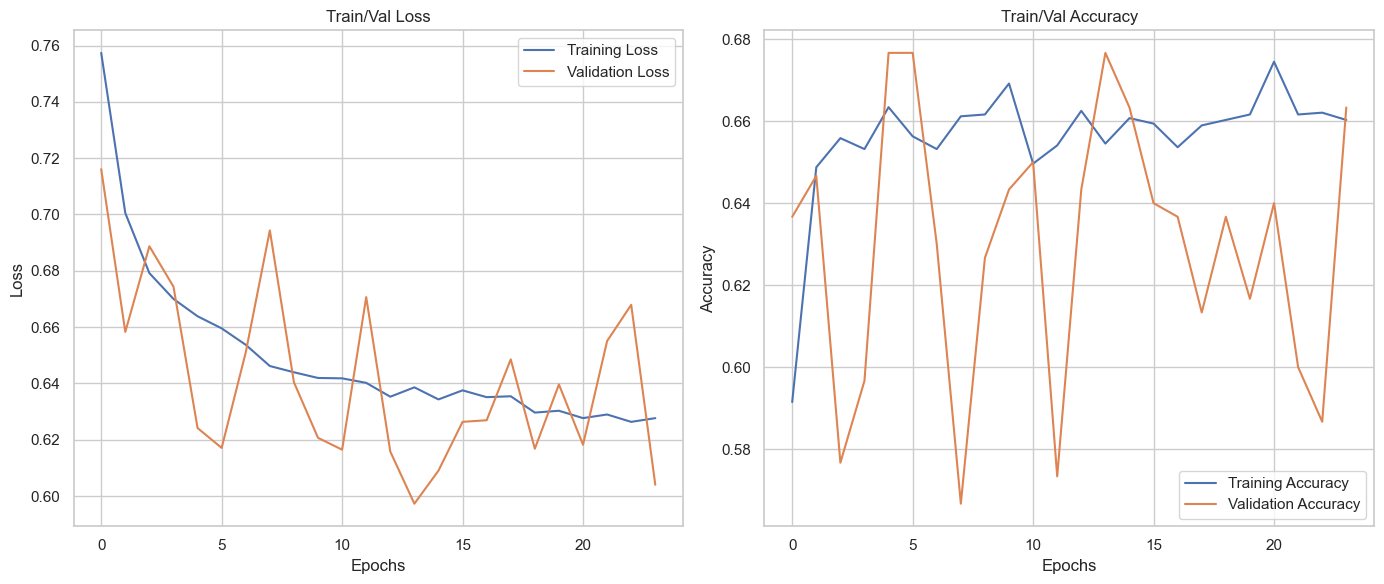

In [97]:
# Plot Train/Val Loss/Accuracy
# ----------------------------

history_dict = history.history

# Plot Train/Val Loss
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Train/Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Train/Val Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Train/Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.savefig("task_10a_train_val_loss_acc")
plt.show()


### 🔎 Training Process Visualization and Convergence Analysis

#### 📊 Loss and Accuracy Trends

The training and validation loss/accuracy plots reveal the following insights:

- **Training Loss**: Shows a smooth and steady decline, indicating consistent learning during training.  
- **Validation Loss**: Fluctuates more than training loss, but also shows an overall downward trend before plateauing, suggesting moderate convergence.  
- **Training Accuracy**: Gradually increases, stabilizing around ~66% in later epochs.  
- **Validation Accuracy**: Fluctuates across epochs, but stays in a similar range as training accuracy, peaking around ~67%.  

#### 📉 Convergence and Overfitting/Underfitting

- **Model Convergence**: The model **converged around epoch 14**, where validation loss was lowest. Training continued for a few more epochs until early stopping.  
- **Overfitting**: There is **no clear sign of overfitting**. While validation accuracy is volatile, the gap between training and validation accuracy is relatively narrow.  
- **Underfitting**: Not evident, as the model is learning and both metrics improve over time.  

✅ **Conclusion**:  
The model training process is stable. Use of early stopping and learning rate reduction helped the model avoid overfitting, and it achieved generalization without underfitting.


## 📌 Task 11: Tune Hyperparameters

- Adjust learning rate, batch size, or network architecture as needed. Use these values:
   - `learning_rates = [0.01, 0.001]`
   - `batch_sizes = [16, 32]`
   - `dropout_rates = [0.2]`
   - `filter_numbers = [32, 64]`
   - `kernel_sizes = [3]`
- OPTIONAL - Document improvements from tuning


In [134]:
# Tune Hyperparameters Setup
# --------------------------

# Define function to build model
def build_model(learning_rate=0.001, dropout_rate=0.3, kernel_size=2, filters_1=32, filters_2=64):
    model = Sequential()
    
    # Input Layer
    model.add(InputLayer(input_shape=(X_train_smote.shape[1], 1)))  # (features, channels)
    
    # 1st Conv1D Block
    model.add(Conv1D(
        filters=filters_1,
        kernel_size=kernel_size,
        activation='relu',
        padding='same',
        kernel_regularizer=regularizers.l2(0.001)
    ))
    model.add(Dropout(0.3 if dropout_rate==0.3 else dropout_rate))

    # 2nd Conv1D Block
    model.add(Conv1D(
        filters=filters_2,
        kernel_size=kernel_size,
        activation='relu',
        padding='same',
        kernel_regularizer=regularizers.l2(0.001)
    ))
    model.add(Dropout(0.3 if dropout_rate==0.3 else dropout_rate))

    # Global Pooling
    model.add(GlobalAveragePooling1D())
    
    # Dense Layer
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dropout(0.5 if dropout_rate==0.3 else dropout_rate))
    
    # Output Layer
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Define function to help in plotting
def plot_graph(history_dict, title, savefile):
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(history_dict['loss'], label='Training Loss')
    plt.plot(history_dict['val_loss'], label='Validation Loss')
    plt.title(f'{title} Train/Val Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    # Plot Train/Val Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history_dict['accuracy'], label='Training Accuracy')
    plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} Train/Val Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig(savefile)
    plt.show()

In [135]:
# Testing LR = 0.001 vs 0.01
# --------------------------

histories = {}

for lr in [0.001, 0.01]:
    print(f"\n🔧 Training model with learning rate: {lr}\n")
    
    # Build model with specified learning rate
    model = build_model(learning_rate=lr, dropout_rate=0.3, filters_1=32, filters_2=64, kernel_size=2)
    
    # Compile callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint(f'best_model_lr_{lr}.h5', monitor='val_loss', save_best_only=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

    # Train model
    history = model.fit(
        X_train_smote, y_train_smote,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=32,
        callbacks=[early_stopping, model_checkpoint, reduce_lr],
        verbose=1
    )

    # Store history for later comparison
    histories[lr] = history



🔧 Training model with learning rate: 0.001

Epoch 1/100
71/71 [==============================] - 1s 6ms/step - loss: 0.7621 - accuracy: 0.5702 - val_loss: 0.6720 - val_accuracy: 0.7167 - lr: 0.0010
Epoch 2/100
71/71 [==============================] - 0s 5ms/step - loss: 0.6959 - accuracy: 0.6474 - val_loss: 0.6690 - val_accuracy: 0.6367 - lr: 0.0010
Epoch 3/100
71/71 [==============================] - 0s 5ms/step - loss: 0.6804 - accuracy: 0.6483 - val_loss: 0.6638 - val_accuracy: 0.6300 - lr: 0.0010
Epoch 4/100
71/71 [==============================] - 0s 5ms/step - loss: 0.6623 - accuracy: 0.6625 - val_loss: 0.6463 - val_accuracy: 0.6400 - lr: 0.0010
Epoch 5/100
71/71 [==============================] - 0s 5ms/step - loss: 0.6538 - accuracy: 0.6528 - val_loss: 0.6455 - val_accuracy: 0.6300 - lr: 0.0010
Epoch 6/100
71/71 [==============================] - 0s 5ms/step - loss: 0.6569 - accuracy: 0.6519 - val_loss: 0.6219 - val_accuracy: 0.6533 - lr: 0.0010
Epoch 7/100
71/71 [============

In [136]:
histories

{0.001: <keras.callbacks.History at 0x1fd52fef970>,
 0.01: <keras.callbacks.History at 0x1fd6079fee0>}

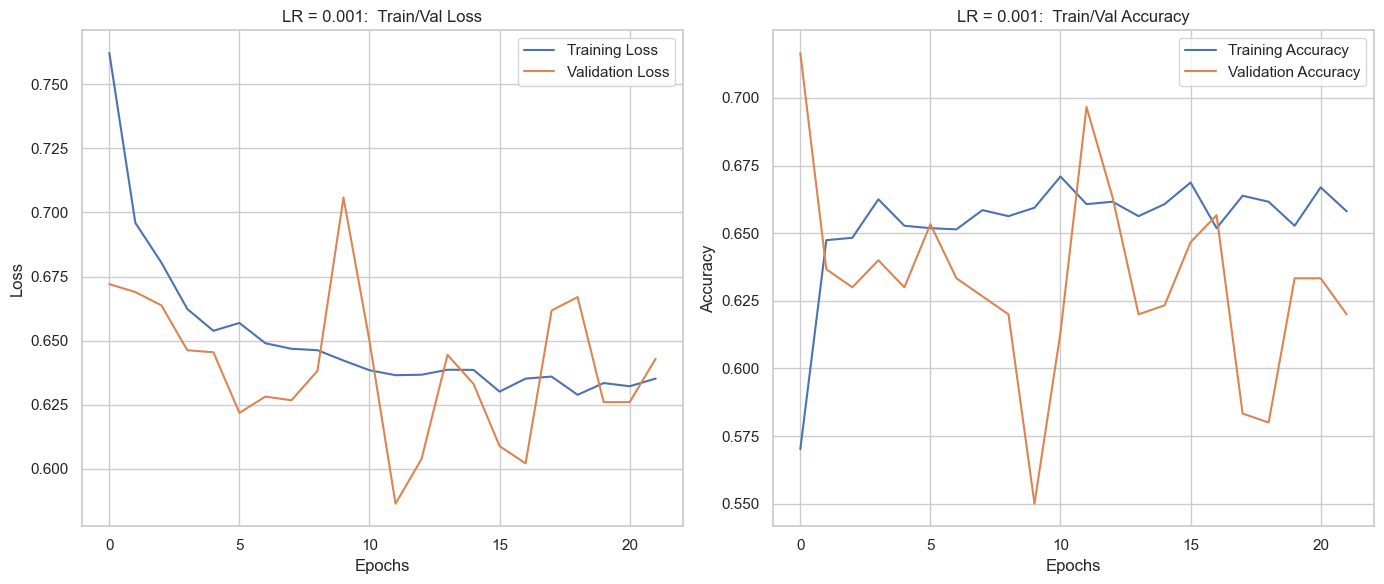

In [137]:
plot_graph(histories[0.001].history, "LR = 0.001: ", "task_11a_lr_001")

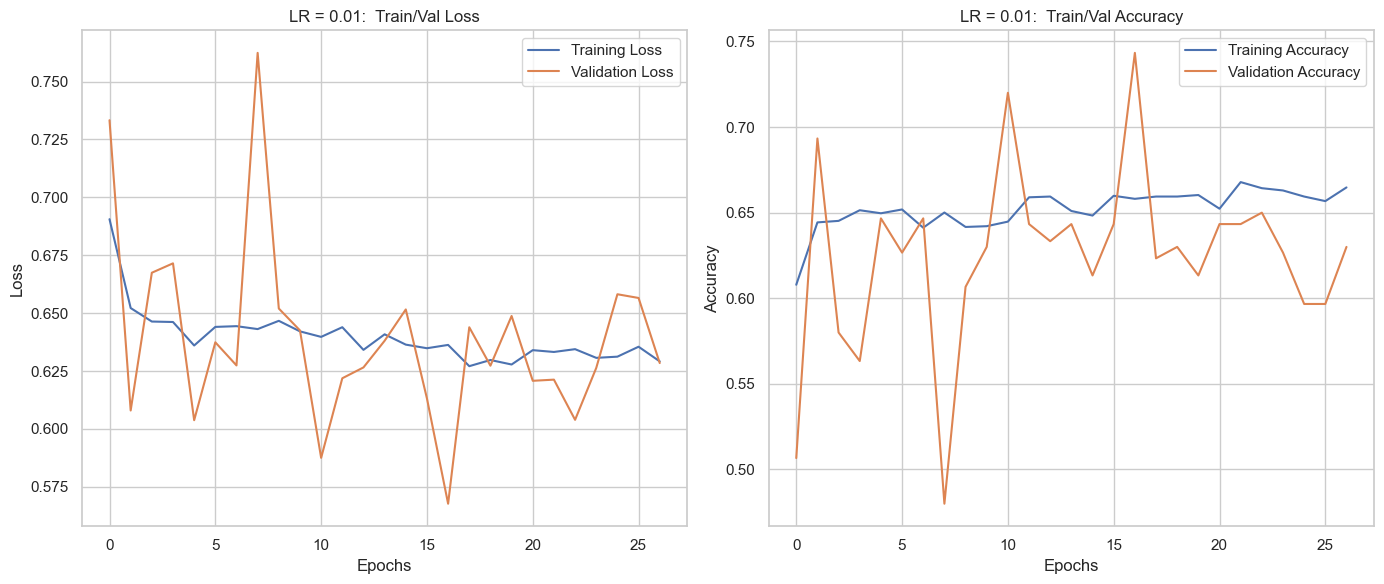

In [138]:
plot_graph(histories[0.01].history, "LR = 0.01: ", "task_11b_lr_01")

### 🧪 Learning Rate Comparison: 0.001 vs. 0.01

#### 📉 Loss and Accuracy Trends:
- **LR = 0.001**:
  - Training loss decreases steadily and stabilizes.
  - Validation loss also shows general downward trend but fluctuates in later epochs.
  - Accuracy is stable and higher on both train and validation datasets.

- **LR = 0.01**:
  - Training loss starts low but flattens early, with smaller overall improvement.
  - Validation loss is more erratic with frequent spikes.
  - Accuracy fluctuates significantly and does not improve consistently.

#### 🔍 Convergence & Stability
- LR = 0.001 shows **better generalization**: lower validation loss and higher validation accuracy.
- LR = 0.01 may be **too aggressive**, potentially overshooting optimal weights and failing to converge properly.

#### ➡️ Conclusion
We will proceed with **learning rate = 0.001**


In [139]:
# Testing Batch Size = 16 vs 32
# -----------------------------

histories = {}

for bs in [16,32]:
    print(f"\n🔧 Training model with batch size: {bs}\n")
    
    # Build model with specified learning rate
    model = build_model(learning_rate=0.001, dropout_rate=0.3, filters_1=32, filters_2=64, kernel_size=2)
    
    # Compile callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint(f'best_model_bs_{bs}.h5', monitor='val_loss', save_best_only=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

    # Train model
    history = model.fit(
        X_train_smote, y_train_smote,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=bs,
        callbacks=[early_stopping, model_checkpoint, reduce_lr],
        verbose=1
    )

    # Store history for later comparison
    histories[bs] = history



🔧 Training model with batch size: 16

Epoch 1/100
141/141 [==============================] - 1s 6ms/step - loss: 0.7356 - accuracy: 0.6132 - val_loss: 0.6472 - val_accuracy: 0.6900 - lr: 0.0010
Epoch 2/100
141/141 [==============================] - 1s 4ms/step - loss: 0.6867 - accuracy: 0.6474 - val_loss: 0.6726 - val_accuracy: 0.6367 - lr: 0.0010
Epoch 3/100
141/141 [==============================] - 1s 4ms/step - loss: 0.6639 - accuracy: 0.6541 - val_loss: 0.5995 - val_accuracy: 0.7267 - lr: 0.0010
Epoch 4/100
141/141 [==============================] - 1s 4ms/step - loss: 0.6574 - accuracy: 0.6559 - val_loss: 0.6726 - val_accuracy: 0.5933 - lr: 0.0010
Epoch 5/100
141/141 [==============================] - 1s 4ms/step - loss: 0.6553 - accuracy: 0.6612 - val_loss: 0.6327 - val_accuracy: 0.6467 - lr: 0.0010
Epoch 6/100
141/141 [==============================] - 1s 4ms/step - loss: 0.6430 - accuracy: 0.6545 - val_loss: 0.5882 - val_accuracy: 0.7133 - lr: 0.0010
Epoch 7/100
141/141 [====

In [140]:
histories

{16: <keras.callbacks.History at 0x1fdbaaabd00>,
 32: <keras.callbacks.History at 0x1fdbac82ca0>}

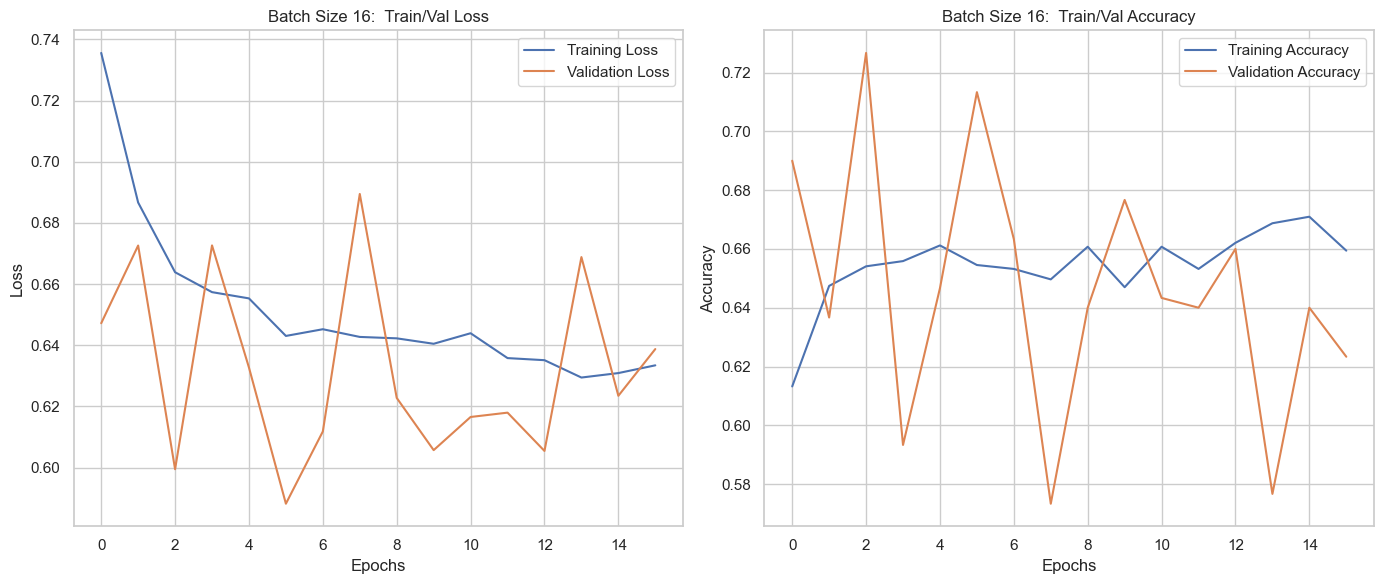

In [141]:
plot_graph(histories[16].history, "Batch Size 16: ", "task_11c_batch_16")

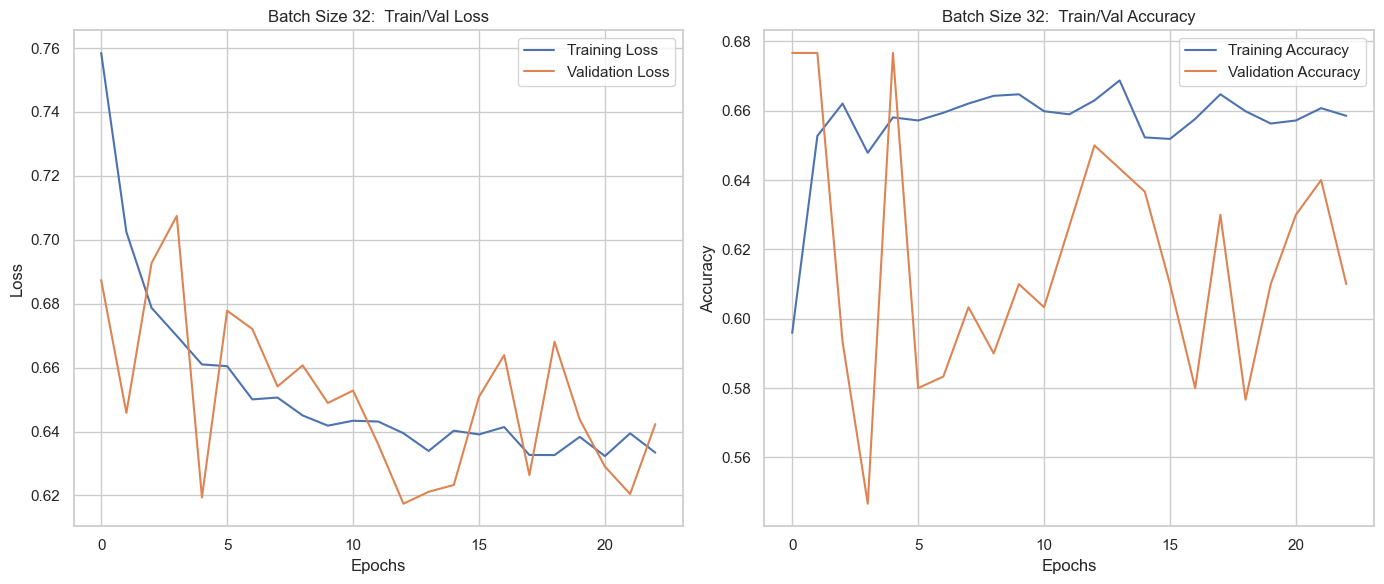

In [142]:
plot_graph(histories[32].history, "Batch Size 32: ", "task_11d_batch_32")

### 🧪 Batch Size Comparison: 16 vs 32

**Batch Size 16:**
- Validation accuracy fluctuates heavily across epochs.
- Training and validation loss curves are noisier and less consistent.
- Achieved a few high spikes in accuracy (up to ~0.73) but could not sustain them.

**Batch Size 32:**
- Training and validation accuracy curves are more stable.
- Validation loss decreases more consistently and reaches a lower value overall.
- Although the max validation accuracy is slightly lower than batch size 16’s best spike, its sustained performance is more reliable and generalizable.

➡️ **Action**: Proceed with **batch size = 32** for further training and tuning.


In [147]:
# Testing Dropout Rate = 0.3/0.5 vs 0.2
# -------------------------------------

histories = {}

for dr in [0.3, 0.2]:
    print(f"\n🔧 Training model with dropout rate: {dr}\n")
    
    # Build model with specified learning rate
    model = build_model(learning_rate=0.001, dropout_rate=dr, filters_1=32, filters_2=64, kernel_size=2)
    
    # Compile callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint(f'best_model_dropout_{dr}.h5', monitor='val_loss', save_best_only=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

    # Train model
    history = model.fit(
        X_train_smote, y_train_smote,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=32,
        callbacks=[early_stopping, model_checkpoint, reduce_lr],
        verbose=1
    )

    # Store history for later comparison
    histories[dr] = history



🔧 Training model with dropout rate: 0.3

Epoch 1/100
71/71 [==============================] - 1s 7ms/step - loss: 0.7545 - accuracy: 0.6172 - val_loss: 0.6580 - val_accuracy: 0.6967 - lr: 0.0010
Epoch 2/100
71/71 [==============================] - 0s 5ms/step - loss: 0.7084 - accuracy: 0.6359 - val_loss: 0.6945 - val_accuracy: 0.6333 - lr: 0.0010
Epoch 3/100
71/71 [==============================] - 0s 5ms/step - loss: 0.6834 - accuracy: 0.6554 - val_loss: 0.6680 - val_accuracy: 0.6433 - lr: 0.0010
Epoch 4/100
71/71 [==============================] - 0s 5ms/step - loss: 0.6789 - accuracy: 0.6474 - val_loss: 0.6601 - val_accuracy: 0.6333 - lr: 0.0010
Epoch 5/100
71/71 [==============================] - 0s 5ms/step - loss: 0.6634 - accuracy: 0.6563 - val_loss: 0.6815 - val_accuracy: 0.5867 - lr: 0.0010
Epoch 6/100
57/71 [=======================>......] - ETA: 0s - loss: 0.6607 - accuracy: 0.6623
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
71/71 [==========

In [148]:
histories

{0.3: <keras.callbacks.History at 0x1fdd8011280>,
 0.2: <keras.callbacks.History at 0x1fdd822d2e0>}

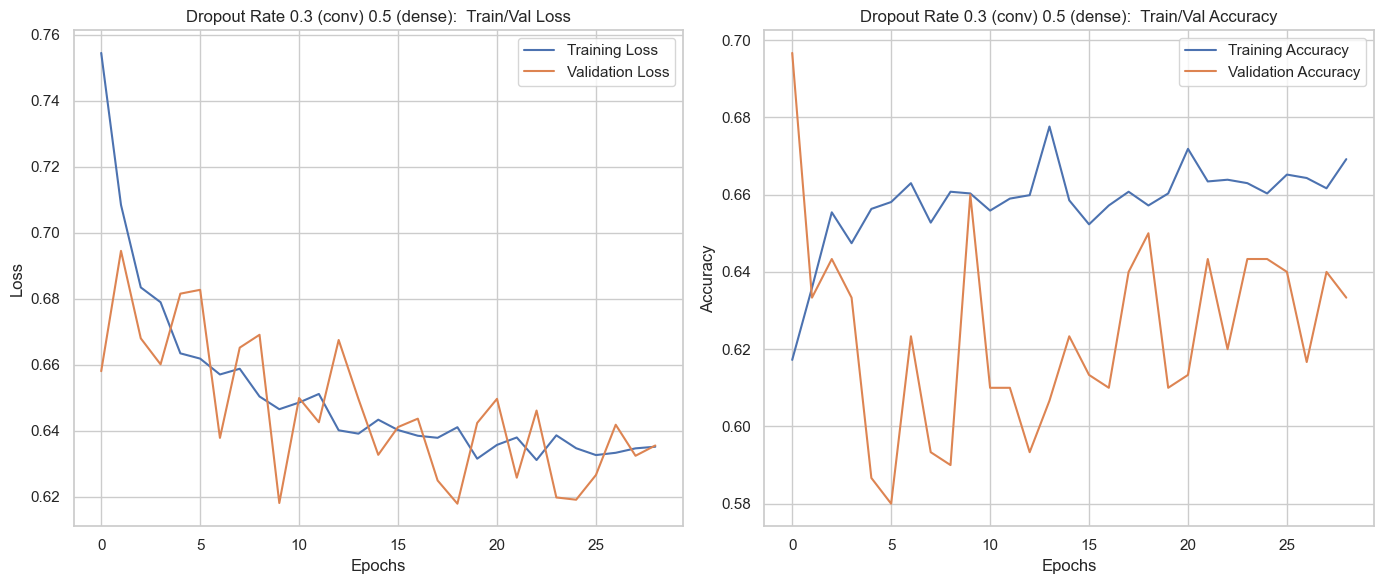

In [149]:
plot_graph(histories[0.3].history, "Dropout Rate 0.3 (conv) 0.5 (dense): ", "task_11e_dropout_0305")

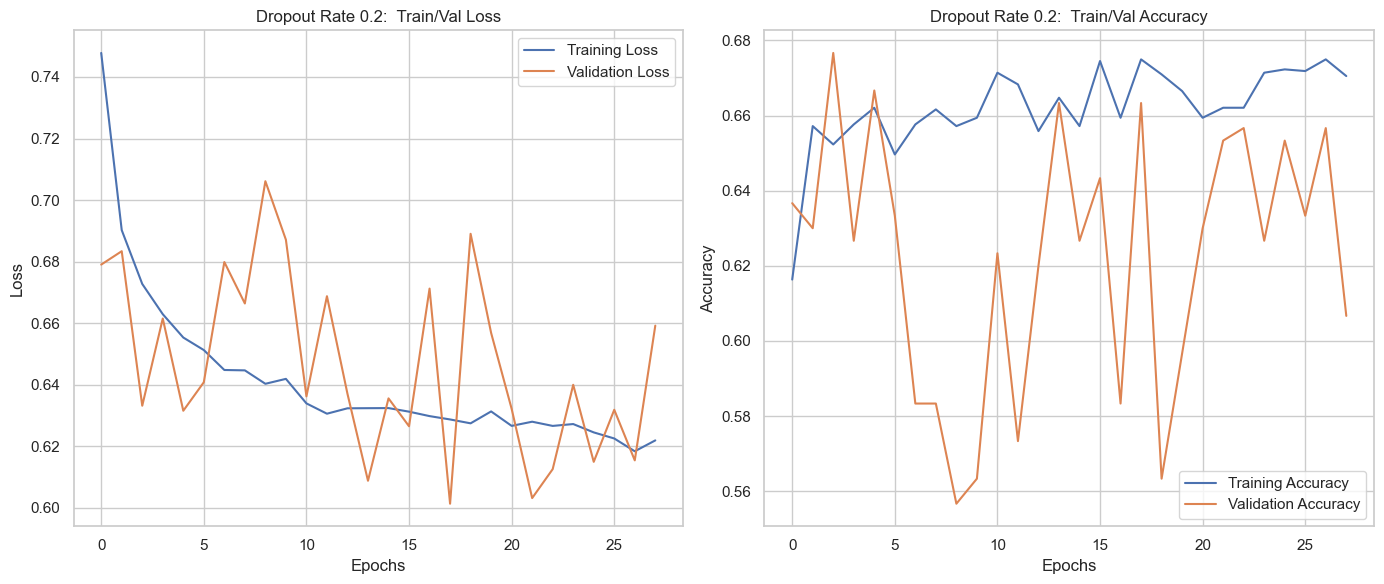

In [146]:
plot_graph(histories[0.2].history, "Dropout Rate 0.2: ", "task_11f_dropout_02")

### 🧪 Dropout Rate Comparison - 0.3 (conv) / 0.5 (dense) vs 0.2 (all)

#### 🔍 Observations

- Both configurations showed comparable validation accuracy, with **dropout 0.2 slightly outperforming** in peak performance and general stability.
- The **0.2 dropout configuration achieved higher max validation accuracy (~66.7%)** compared to the 0.3/0.5 configuration (~64.5%).
- Training loss and accuracy were slightly smoother for the **0.3/0.5 configuration**, suggesting it might be more effective at regularizing.
- However, **validation loss in the 0.2 dropout setting was more consistent**, which is favorable for generalization.

#### ➡️ Conclusion

- We will proceed with **Dropout Rate 0.2**


In [150]:
# Testing Filters = 16/32 vs 32/64 vs 64/128
# ------------------------------------------

histories = {}

for fr in [16,32,64]:
    print(f"\n🔧 Training model with filter: {fr}\n")
    
    # Build model with specified learning rate
    model = build_model(learning_rate=0.001, dropout_rate=0.2, filters_1=fr, filters_2=fr*2, kernel_size=2)
    
    # Compile callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint(f'best_model_filter_{fr*2}.h5', monitor='val_loss', save_best_only=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

    # Train model
    history = model.fit(
        X_train_smote, y_train_smote,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=32,
        callbacks=[early_stopping, model_checkpoint, reduce_lr],
        verbose=1
    )

    # Store history for later comparison
    histories[fr] = history



🔧 Training model with filter: 16

Epoch 1/100
71/71 [==============================] - 1s 6ms/step - loss: 0.7238 - accuracy: 0.6159 - val_loss: 0.6889 - val_accuracy: 0.6233 - lr: 0.0010
Epoch 2/100
71/71 [==============================] - 0s 4ms/step - loss: 0.6801 - accuracy: 0.6408 - val_loss: 0.6538 - val_accuracy: 0.6267 - lr: 0.0010
Epoch 3/100
71/71 [==============================] - 0s 5ms/step - loss: 0.6637 - accuracy: 0.6612 - val_loss: 0.6471 - val_accuracy: 0.6333 - lr: 0.0010
Epoch 4/100
71/71 [==============================] - 0s 5ms/step - loss: 0.6570 - accuracy: 0.6616 - val_loss: 0.5947 - val_accuracy: 0.7100 - lr: 0.0010
Epoch 5/100
71/71 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6585 - val_loss: 0.6712 - val_accuracy: 0.5900 - lr: 0.0010
Epoch 6/100
71/71 [==============================] - 0s 4ms/step - loss: 0.6522 - accuracy: 0.6461 - val_loss: 0.6305 - val_accuracy: 0.6500 - lr: 0.0010
Epoch 7/100
71/71 [======================

In [151]:
histories

{16: <keras.callbacks.History at 0x1fdd8879430>,
 32: <keras.callbacks.History at 0x1fddad1cd90>,
 64: <keras.callbacks.History at 0x1fddaedd280>}

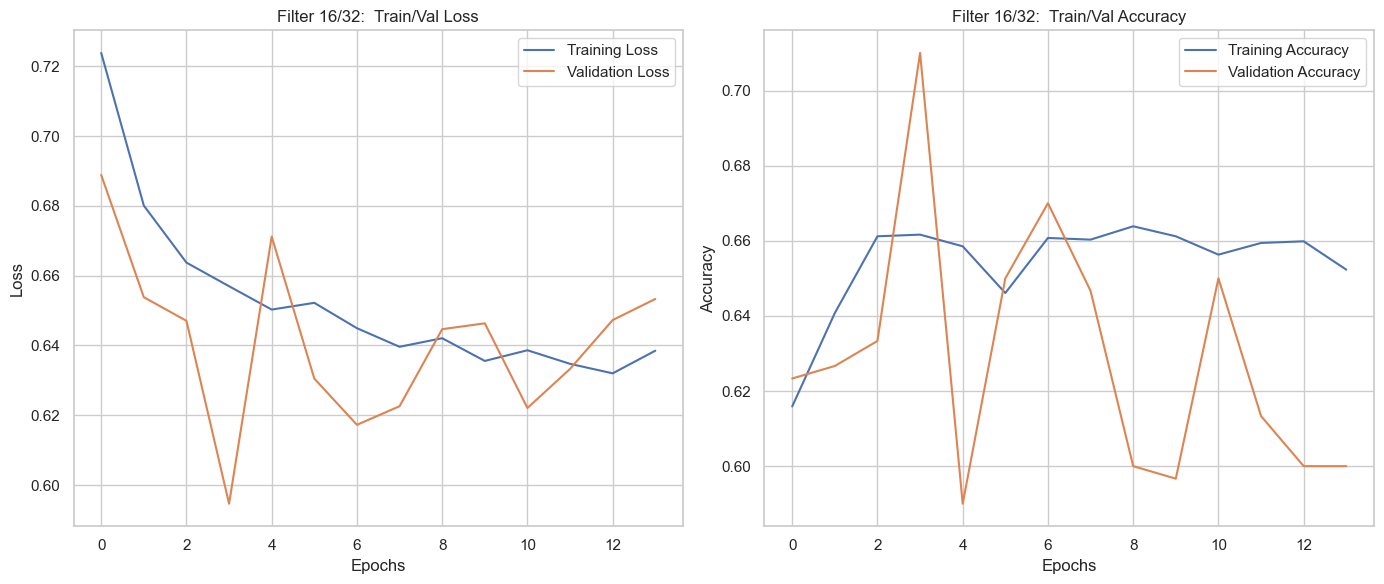

In [152]:
plot_graph(histories[16].history, "Filter 16/32: ", "task_11g_filter_32")

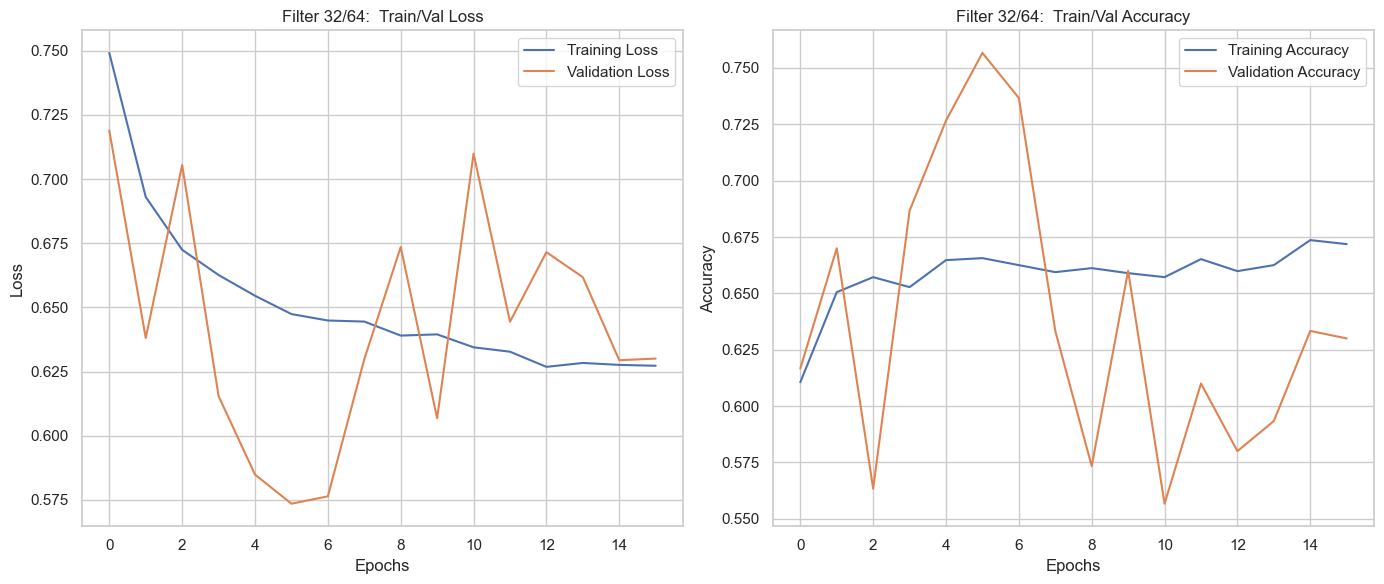

In [153]:
plot_graph(histories[32].history, "Filter 32/64: ", "task_11h_filter_64")

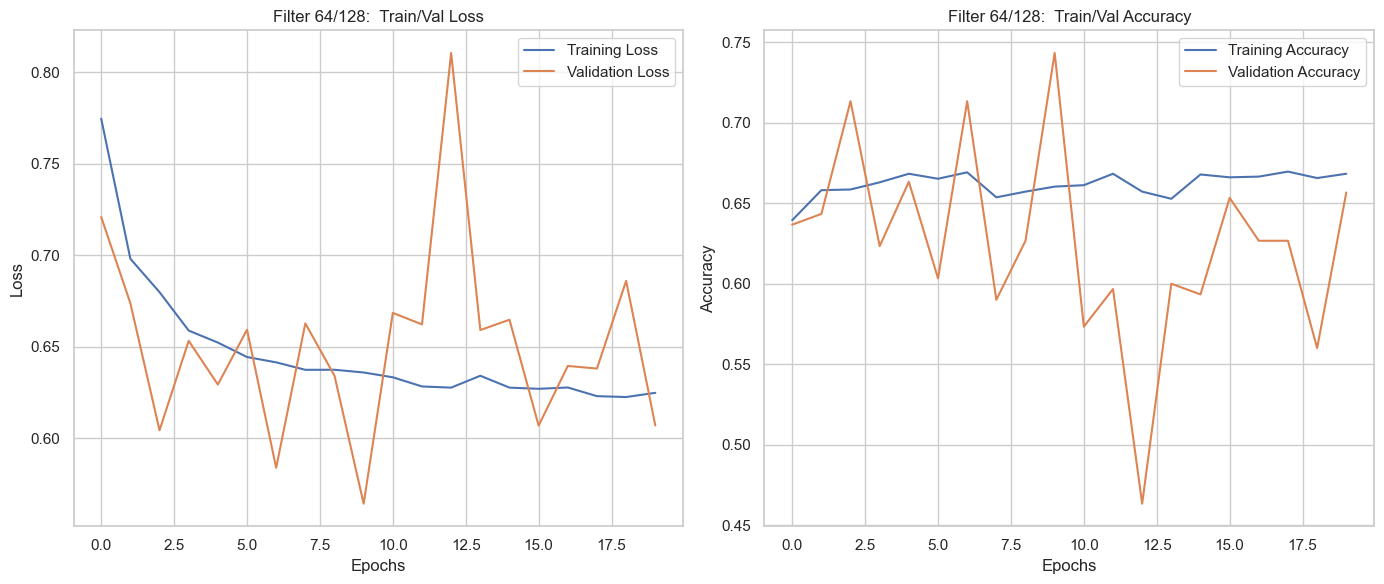

In [154]:
plot_graph(histories[64].history, "Filter 64/128: ", "task_11i_filter_128")

### 🧪 Hyperparameter Tuning: Filter Size Comparison

We compared three different filter configurations for the two Conv1D layers:
- **16/32 filters**
- **32/64 filters**
- **64/128 filters**

#### 🔍 Observations:
- **Filter 32/64** achieved the most promising results in terms of **validation accuracy**, with several peaks above 0.70 and a generally rising trend.
- **Filter 16/32** showed decent stability in both training and validation loss, but performance plateaued and validation accuracy remained moderate (~0.66).
- **Filter 64/128**, although producing the smoothest training loss curve, exhibited high variance in validation accuracy and loss, indicating potential overfitting or increased model complexity without consistent generalization gains.

#### ✅ Conclusion:
The **32/64 filter** configuration provided the best trade-off between model complexity and validation performance. It showed strong generalization, outperforming both smaller and larger filter sizes in terms of validation accuracy while maintaining training stability.

#### ➡️ Conclusion:
We proceed with **32/64 filter** configuration as it provided the best trade-off between model complexity and validation performance. It showed strong generalization, outperforming both smaller and larger filter sizes in terms of validation accuracy while maintaining training stability.



In [155]:
# Testing kernel size = 2 vs 3
# ----------------------------

histories = {}

for kn in [2,3]:
    print(f"\n🔧 Training model with kernel size: {kn}\n")
    
    # Build model with specified learning rate
    model = build_model(learning_rate=0.001, dropout_rate=0.2, filters_1=32, filters_2=64, kernel_size=kn)
    
    # Compile callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint(f'best_model_kernel_{kn}.h5', monitor='val_loss', save_best_only=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

    # Train model
    history = model.fit(
        X_train_smote, y_train_smote,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=32,
        callbacks=[early_stopping, model_checkpoint, reduce_lr],
        verbose=1
    )

    # Store history for later comparison
    histories[kn] = history



🔧 Training model with kernel size: 2

Epoch 1/100
71/71 [==============================] - 1s 7ms/step - loss: 0.7487 - accuracy: 0.6323 - val_loss: 0.6997 - val_accuracy: 0.6367 - lr: 0.0010
Epoch 2/100
71/71 [==============================] - 0s 5ms/step - loss: 0.6902 - accuracy: 0.6536 - val_loss: 0.7292 - val_accuracy: 0.5467 - lr: 0.0010
Epoch 3/100
71/71 [==============================] - 0s 5ms/step - loss: 0.6719 - accuracy: 0.6607 - val_loss: 0.6220 - val_accuracy: 0.6800 - lr: 0.0010
Epoch 4/100
71/71 [==============================] - 0s 5ms/step - loss: 0.6633 - accuracy: 0.6572 - val_loss: 0.6079 - val_accuracy: 0.7100 - lr: 0.0010
Epoch 5/100
71/71 [==============================] - 0s 5ms/step - loss: 0.6556 - accuracy: 0.6536 - val_loss: 0.6663 - val_accuracy: 0.6033 - lr: 0.0010
Epoch 6/100
71/71 [==============================] - 0s 5ms/step - loss: 0.6489 - accuracy: 0.6701 - val_loss: 0.7182 - val_accuracy: 0.5433 - lr: 0.0010
Epoch 7/100
71/71 [==================

In [156]:
histories

{2: <keras.callbacks.History at 0x1fdde60a220>,
 3: <keras.callbacks.History at 0x1fddeb69100>}

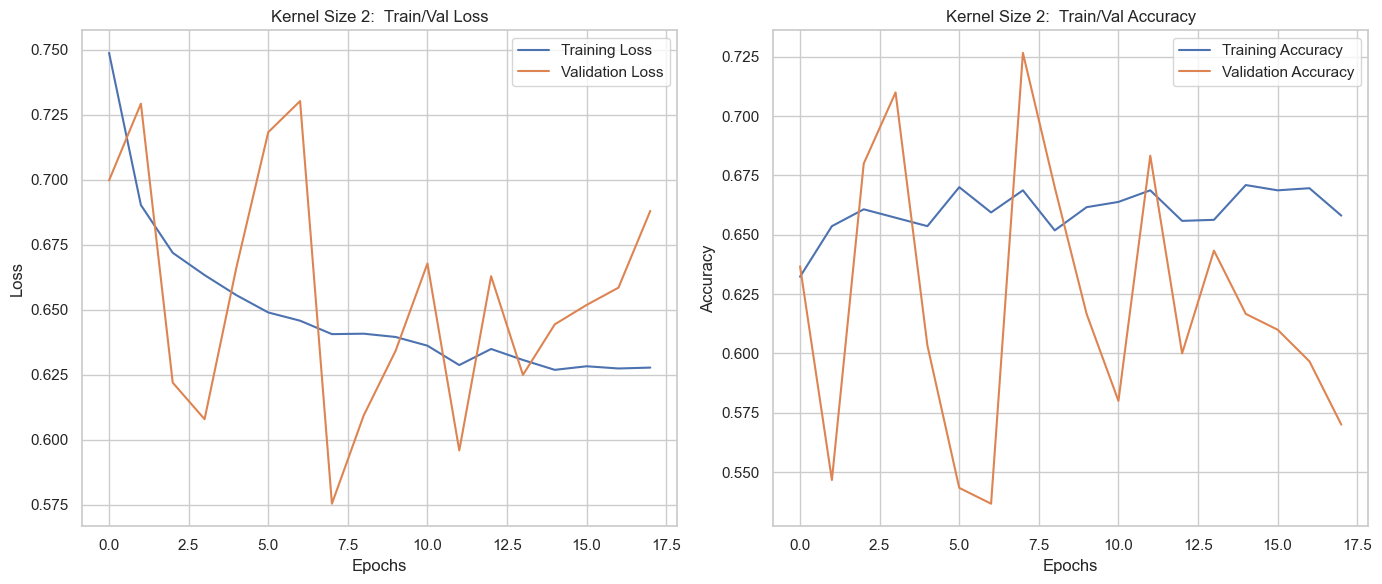

In [157]:
plot_graph(histories[2].history, "Kernel Size 2: ", "task_11j_kernel_2")

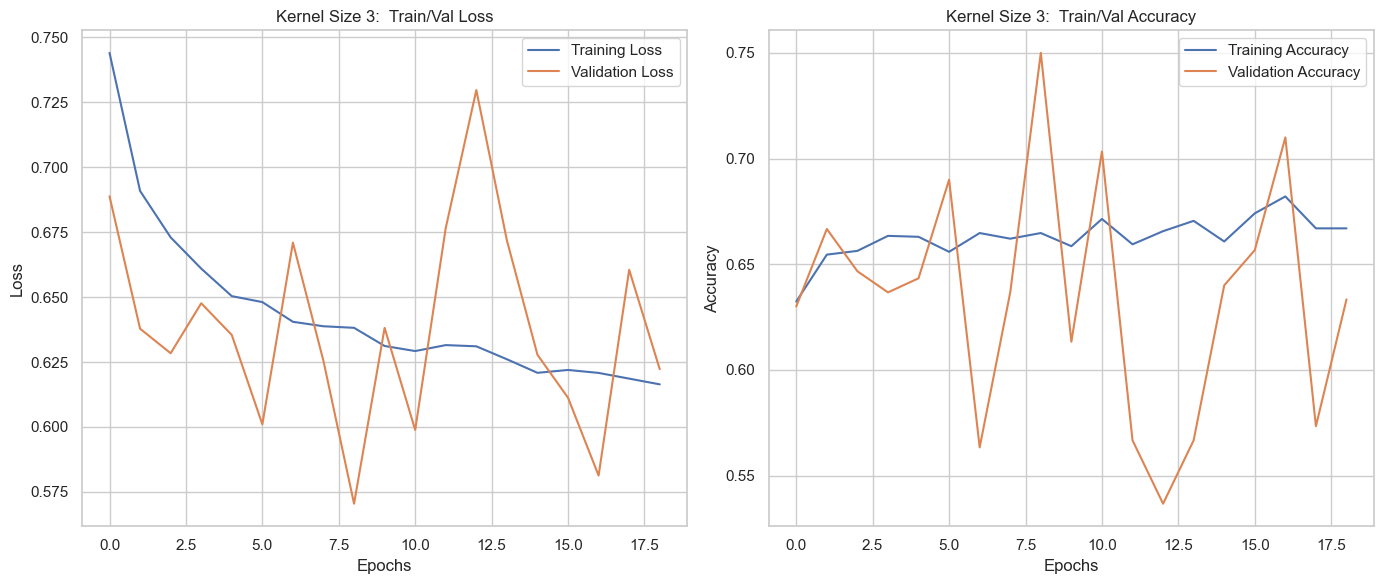

In [158]:
plot_graph(histories[3].history, "Kernel Size 3: ", "task_11k_kernel_3")

### 🧪 Kernel Size Comparison (2 vs 3)

#### 🔍 Observations

**Training Loss & Accuracy:**
- Both kernel sizes exhibit similar trends in training loss and accuracy.
- Kernel size 3 showed a slightly faster convergence in training loss.

**Validation Accuracy:**
- Kernel size 3 generally led to slightly higher validation accuracy peaks than kernel size 2.
- However, validation performance was more volatile for both, especially for kernel size 3.

#### ➡️ Conclusion
- We will go with **kernel size 3**.


### 🏁 Final Hyperparameter Selection Summary

After performing a systematic manual grid search across key hyperparameters, we arrived at the optimal configuration based on validation performance, training stability, and generalization:

**✅ Selected Hyperparameters:**
- **Learning Rate:** `0.001`
- **Batch Size:** `32`
- **Dropout Rate:** `0.2`
- **Filter Configuration:** `32 / 64` (first and second Conv layers)
- **Kernel Size:** `2`

#### ➡️ Action

- Train the final model using these hyperparameters


In [160]:
# Train the model once again with selected hyperparameters
# --------------------------------------------------------

# Model
final_model = build_model(
    learning_rate=0.001,
    dropout_rate=0.2,
    filters_1=32,
    filters_2=64,
    kernel_size=3
)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(f'best_model_final.h5', monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# Train
final_history = final_model.fit(
    X_train_smote, y_train_smote,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, model_checkpoint, reduce_lr],
    verbose=1
)


Epoch 1/100
71/71 [==============================] - 1s 8ms/step - loss: 0.7483 - accuracy: 0.6128 - val_loss: 0.7313 - val_accuracy: 0.5700 - lr: 0.0010
Epoch 2/100
71/71 [==============================] - 0s 5ms/step - loss: 0.6917 - accuracy: 0.6554 - val_loss: 0.6758 - val_accuracy: 0.6200 - lr: 0.0010
Epoch 3/100
71/71 [==============================] - 0s 5ms/step - loss: 0.6730 - accuracy: 0.6616 - val_loss: 0.6778 - val_accuracy: 0.6167 - lr: 0.0010
Epoch 4/100
71/71 [==============================] - 0s 6ms/step - loss: 0.6604 - accuracy: 0.6581 - val_loss: 0.6527 - val_accuracy: 0.6267 - lr: 0.0010
Epoch 5/100
71/71 [==============================] - 0s 5ms/step - loss: 0.6497 - accuracy: 0.6696 - val_loss: 0.6898 - val_accuracy: 0.5567 - lr: 0.0010
Epoch 6/100
71/71 [==============================] - 0s 5ms/step - loss: 0.6459 - accuracy: 0.6621 - val_loss: 0.6707 - val_accuracy: 0.5767 - lr: 0.0010
Epoch 7/100
71/71 [==============================] - 0s 6ms/step - loss: 0.6

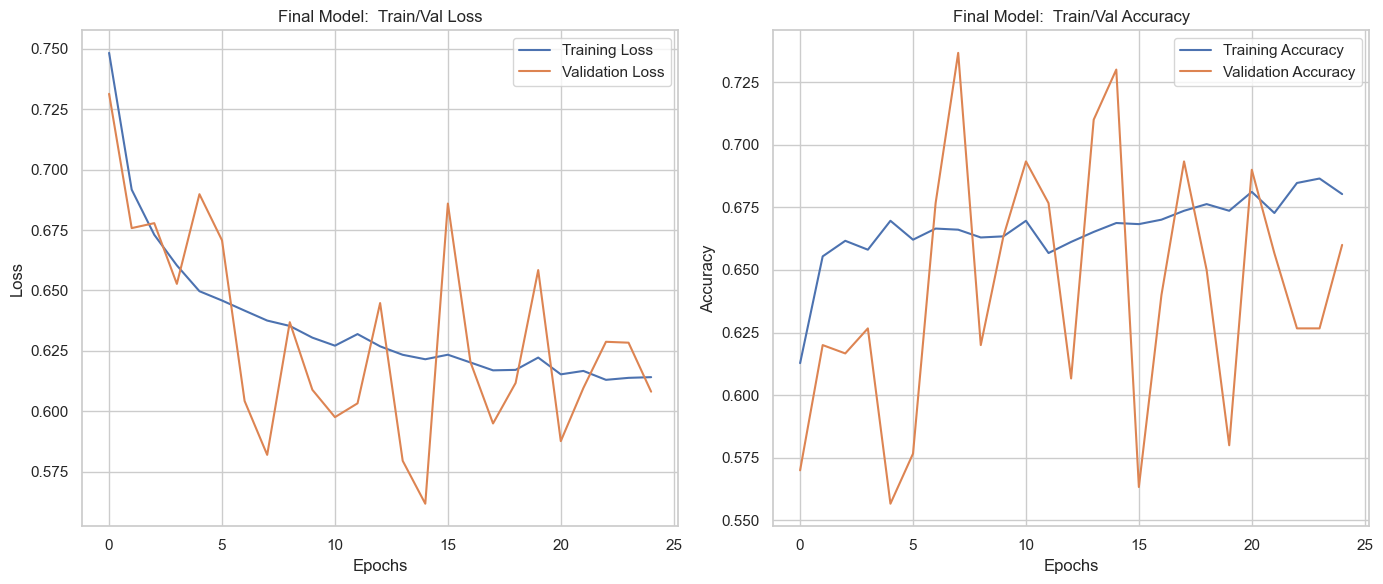

In [161]:
plot_graph(final_history.history, "Final Model: ", "task_12a_final_model")

## 📌 Task 12: Evaluate the Model on the Test Dataset:

- Calculate accuracy, precision, recall, F1-score
- Generate confusion matrix
- Create and analyse ROC curve and calculate AUC


In [162]:
# Load the best checkpoint
# ------------------------

final_model = build_model(
    learning_rate=0.001,
    dropout_rate=0.2,
    filters_1=32,
    filters_2=64,
    kernel_size=3
)

final_model.load_weights('best_model_final.h5')


In [164]:
# Accuracy, Precision, Recall, F1-score
# -------------------------------------

# Predict probabilities
y_pred_proba = final_model.predict(X_test)

# Convert probabilities to class labels (assuming binary classification)
y_pred = (y_pred_proba > 0.5).astype("int32")

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")


10/10 [==============================] - 0s 1ms/step
Accuracy:  0.7000
Precision: 0.8386
Recall:    0.7759
F1 Score:  0.8060


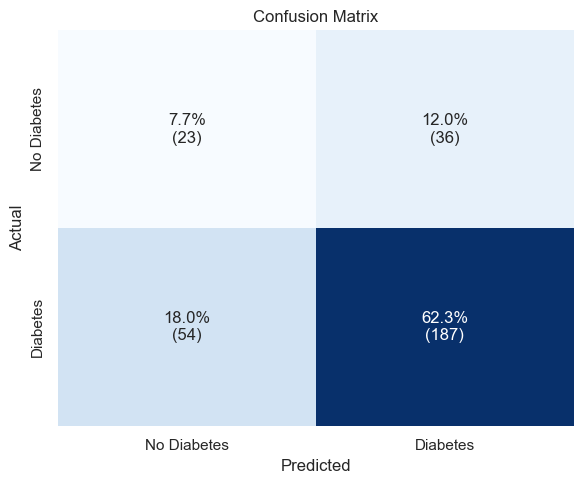

In [169]:
# Confusion Matrix
# ----------------

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_sum = np.sum(cm)
cm_percent = cm / cm_sum * 100

# Create annotations with percentage and count
annot = np.empty_like(cm).astype(str)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        annot[i, j] = f"{cm_percent[i, j]:.1f}%\n({cm[i, j]})"

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=annot, fmt='', cmap='Blues', cbar=False,
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.tight_layout()
plt.savefig("task_12b_confusion_matrix")
plt.show()

In [168]:
cm

array([[ 23,  36],
       [ 54, 187]], dtype=int64)

10/10 [==============================] - 0s 1ms/step


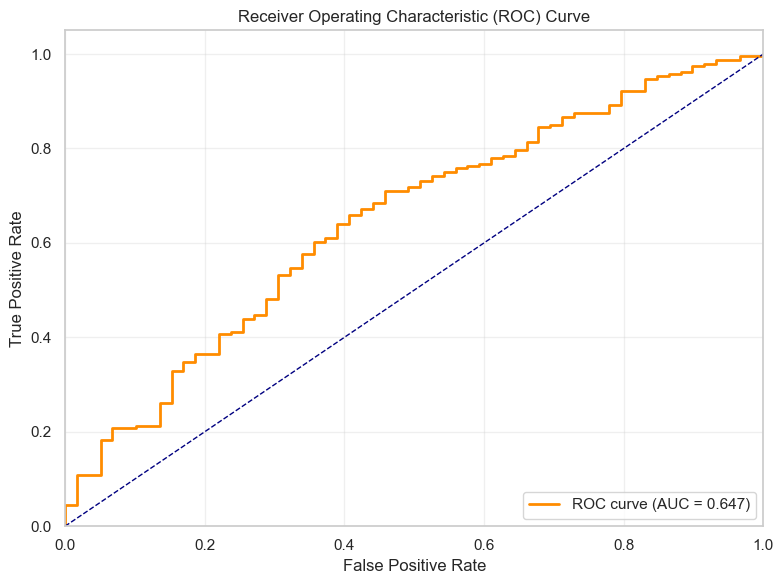

In [172]:
# ROC Curve and AUC
# -----------------

# Get prediction probabilities instead of 0/1 labels
y_proba = final_model.predict(X_test).reshape(-1) # Converts column matrix to array

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig("task_12c_roc_curve_auc")
plt.show()


### ✅ Final Evaluation Summary

**📊 Performance Metrics on Test Set:**

- Accuracy: 70.00%
- Precision: 83.86%
- Recall (Sensitivity): 77.59%
- F1 Score: 80.60%

These values indicate that the model performs reasonably well, especially in detecting positive cases (patients with diabetes), as seen in the relatively high recall and F1-score.

**📊 Confusion Matrix Insights:**

- True Positives (TP): 187 (62.3%)
- True Negatives (TN): 23 (7.7%)
- False Positives (FP): 36 (12.0%)
- False Negatives (FN): 54 (18.0%)

The model tends to misclassify a non-trivial number of actual diabetic patients as non-diabetic (false negatives). This could have serious consequences in a medical context, indicating room for improvement in recall.

**📈 ROC Curve and AUC:**

- AUC (Area Under Curve): 0.647

While better than random (0.5), the AUC indicates only modest discriminative ability between positive and negative classes. This suggests the model does not perfectly distinguish between diabetic and non-diabetic cases across all thresholds.

**🧠 Final Thoughts:**

The model achieves a good balance of precision and recall, with an overall F1-score above 80%, making it useful for early-stage predictions. However, the AUC score and false negative rate highlight opportunities for further refinement—perhaps through:

- Better feature engineering
- Ensemble techniques
- Threshold tuning
- Incorporating additional clinical data

